In [1]:
from sequenzo import *
import pandas as pd

family_df = pd.read_csv('/Users/lei/Documents/japan_romance/multidomain_algorithm/family_15_35.csv')
happiness_df = pd.read_csv('/Users/lei/Documents/japan_romance/multidomain_algorithm/happiness_15_35.csv')

family_df

ID  15  16  17  18  19  20  21  22  23  ...  26  27  28  29  30  31  \
0        1   1   1   1   1   1   1   2   2   2  ...   3   3   3   3   3   3   
1        2   1   1   1   2   1   2   1   1   1  ...   2   2   2   2   2   2   
2        5   2   2   2   2   2   2   2   2   2  ...   2   2   2   2   2   2   
3        6   1   1   2   1   2   1   1   1   1  ...   1   1   1   1   1   1   
4        7   1   1   1   1   1   1   1   1   1  ...   3   3   3   3   3   3   
...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
1533  1992   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   1   1   
1534  1995   2   2   2   2   2   3   3   3   3  ...   3   3   2   3   3   3   
1535  1996   1   2   2   2   2   1   3   3   3  ...   3   3   3   3   3   3   
1536  1997   1   1   1   1   1   1   2   3   3  ...   3   3   3   3   3   3   
1537  1999   1   1   1   1   2   2   1   1   2  ...   3   3   3   3   3   3   

      32  33  34  35  
0      3   3   3   3  
1      2   2   2   3  
2      2   2   2   2  
3      1   1   1   1  
4      3   3   3   3  
...   ..  ..  ..  ..  
1533   1   1   1   1  
1534   3   3   3   3  
1535   3   3   3   3  
1536   3   3   3   3  
1537   3   3   3   3  

[1538 rows x 22 columns]

In [2]:
time_cols = []

for i in list(range(15, 36)):
    time_cols.append(str(i))

family_sequence = SequenceData(data=family_df,
                               time_type='age',
                               time=time_cols,
                               states=[1, 2, 3],
                               labels=["Single", "Romantic Partner", "Married"])

happiness_sequence = SequenceData(data=happiness_df,
                                 time_type='age',
                                 time=time_cols,
                                 states=[1, 2, 3, 4, 5],
                                 labels=["Unhappy", "Somewhat unhappy", "Neutral", "Somewhat happy", "Happy"])


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Min/Max sequence length: 21 / 21
[>] Alphabet: [1, 2, 3]

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Min/Max sequence length: 21 / 21
[>] Alphabet: [1, 2, 3, 4, 5]


## Dissimilarity measure for each sequence

In [3]:
distance_matrix_family = get_distance_matrix(seqdata=family_sequence,
                                                     method='OM',
                                                     sm="CONSTANT",
                                                     indel=1)
distance_matrix_family

[>] Processing 1538 sequences with 3 unique states.
  - Creating 4x4 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 859 unique sequences.
[>] Sequence length: min/max = 21 / 21.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


0     1     2     3     4     5     6     7     8     9     ...  1528  \
0      0.0  20.0  34.0  28.0   8.0   6.0   8.0  10.0   8.0  16.0  ...  16.0   
1     20.0   0.0  20.0  20.0  22.0  26.0  14.0  16.0  12.0  16.0  ...  12.0   
2     34.0  20.0   0.0  36.0  42.0  34.0  34.0  34.0  30.0  32.0  ...  18.0   
3     28.0  20.0  36.0   0.0  24.0  32.0  22.0  18.0  24.0  16.0  ...  28.0   
4      8.0  22.0  42.0  24.0   0.0  12.0  10.0  12.0  12.0  16.0  ...  24.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1533  30.0  24.0  42.0   6.0  24.0  36.0  22.0  20.0  26.0  18.0  ...  32.0   
1534  12.0  28.0  30.0  36.0  18.0   6.0  20.0  22.0  16.0  24.0  ...  22.0   
1535  10.0  30.0  34.0  32.0  14.0   4.0  18.0  20.0  18.0  24.0  ...  22.0   
1536   6.0  26.0  40.0  28.0   6.0   6.0  14.0  16.0  14.0  20.0  ...  22.0   
1537   6.0  24.0  36.0  28.0   6.0   6.0  14.0  12.0  14.0  16.0  ...  18.0   

      1529  1530  1531  1532  1533  1534  1535  1536  1537  
0     16.0  12.0  22.0   4.0  30.0  12.0  10.0   6.0   6.0  
1      8.0  12.0  18.0  20.0  24.0  28.0  30.0  26.0  24.0  
2     20.0  22.0  34.0  38.0  42.0  30.0  34.0  40.0  36.0  
3     26.0  28.0   6.0  24.0   6.0  36.0  32.0  28.0  28.0  
4     22.0  20.0  24.0   4.0  24.0  18.0  14.0   6.0   6.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1533  28.0  32.0   8.0  26.0   0.0  42.0  38.0  30.0  30.0  
1534  24.0  18.0  34.0  16.0  42.0   0.0   4.0  12.0  12.0  
1535  26.0  18.0  30.0  14.0  38.0   4.0   0.0  10.0  10.0  
1536  22.0  18.0  28.0   6.0  30.0  12.0  10.0   0.0   4.0  
1537  22.0  14.0  24.0   6.0  30.0  12.0  10.0   4.0   0.0  

[1538 rows x 1538 columns]

In [4]:
distance_matrix_happiness = get_distance_matrix(seqdata=happiness_sequence,
                                                     method='OM',
                                                     sm="CONSTANT",
                                                     indel=1)
distance_matrix_happiness

[>] Processing 1538 sequences with 5 unique states.
  - Creating 6x6 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 895 unique sequences.
[>] Sequence length: min/max = 21 / 21.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


0     1     2     3     4     5     6     7     8     9     ...  1528  \
0      0.0  32.0  16.0  38.0  42.0  38.0  10.0  32.0  16.0  10.0  ...  10.0   
1     32.0   0.0  28.0  14.0  14.0  20.0  36.0  32.0  32.0  38.0  ...  34.0   
2     16.0  28.0   0.0  36.0  40.0  34.0  16.0  28.0  22.0  16.0  ...  14.0   
3     38.0  14.0  36.0   0.0  12.0  18.0  40.0  34.0  38.0  42.0  ...  38.0   
4     42.0  14.0  40.0  12.0   0.0  24.0  42.0  42.0  42.0  42.0  ...  38.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1533  42.0  14.0  40.0  12.0   0.0  24.0  42.0  42.0  42.0  42.0  ...  38.0   
1534  22.0  28.0  14.0  30.0  38.0  26.0  20.0  32.0  26.0  22.0  ...  20.0   
1535  22.0  28.0  18.0  38.0  42.0  36.0  30.0  16.0  16.0  32.0  ...  32.0   
1536  28.0  28.0  24.0  32.0  36.0  30.0  36.0  16.0  16.0  38.0  ...  34.0   
1537  32.0  32.0  28.0  30.0  38.0  32.0  40.0  26.0  26.0  42.0  ...  38.0   

      1529  1530  1531  1532  1533  1534  1535  1536  1537  
0     32.0  30.0   2.0   6.0  42.0  22.0  22.0  28.0  32.0  
1     32.0   8.0  34.0  32.0  14.0  28.0  28.0  28.0  32.0  
2     28.0  32.0  16.0  16.0  40.0  14.0  18.0  24.0  28.0  
3     38.0  14.0  38.0  38.0  12.0  30.0  38.0  32.0  30.0  
4     42.0  14.0  42.0  42.0   0.0  38.0  42.0  36.0  38.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1533  42.0  14.0  42.0  42.0   0.0  38.0  42.0  36.0  38.0  
1534  34.0  32.0  22.0  22.0  38.0   0.0  24.0  28.0  32.0  
1535  14.0  28.0  24.0  20.0  42.0  24.0   0.0  10.0  26.0  
1536  14.0  32.0  30.0  22.0  36.0  28.0  10.0   0.0  22.0  
1537  26.0  36.0  34.0  26.0  38.0  32.0  26.0  22.0   0.0  

[1538 rows x 1538 columns]

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def cmdscale(D):
    # Number of points
    n = len(D)

    # Centering matrix
    H = np.eye(n) - np.ones((n, n)) / n

    # Double centered distance matrix
    B = -0.5 * H @ (D ** 2) @ H

    # Eigendecomposition
    eigvals, eigvecs = np.linalg.eigh(B)

    # Sort descending
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    # Keep only positive eigvals
    w_positive = eigvals > 0
    L = np.diag(np.sqrt(eigvals[w_positive]))
    V = eigvecs[:, w_positive]

    # Coordinates
    X = V @ L

    return X, eigvals


In [6]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np

def find_mds_knee_point(cum_explained, title='MDS Dimensionality Selection'):
    """
    Ëá™Âä®ÂØªÊâæ MDS ÁöÑÊúÄ‰Ω≥Áª¥Â∫¶Êï∞ÔºàËÜùÁÇπÔºâÂπ∂ÁªòÂõæ„ÄÇ
    
    ÂèÇÊï∞:
        cum_explained (list or np.ndarray): Á¥ØÁßØËß£ÈáäÊñπÂ∑ÆÔºàcumulative explained varianceÔºâ
        title (str): ÂõæË°®Ê†áÈ¢ò
    
    ËøîÂõû:
        knee (int): ËÜùÁÇπÂØπÂ∫îÁöÑÁª¥Â∫¶Êï∞
    """
    # ÊûÑÈÄ†Áª¥Â∫¶Á¥¢ÂºïÔºå‰ªé1ÂºÄÂßã
    dimensions = list(range(1, len(cum_explained) + 1))

    # ‰ΩøÁî® KneeLocator ÊâæËÜùÁÇπ
    knee_finder = KneeLocator(dimensions, cum_explained, curve='concave', direction='increasing')
    knee = knee_finder.knee

    # ÁîªÂõæ
    plt.figure(figsize=(8, 5))
    plt.plot(dimensions, cum_explained, marker='o', label='Cumulative explained variance')
    if knee is not None:
        plt.axvline(knee, color='r', linestyle='--', label=f'Knee at {knee}')
    plt.xlabel('Number of dimensions')
    plt.ylabel('Cumulative explained variance')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

    return knee


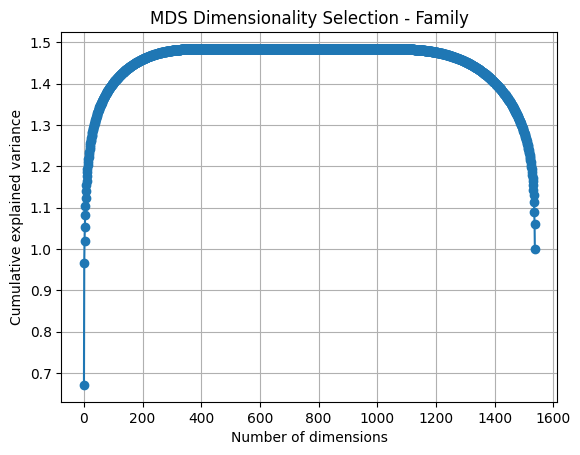

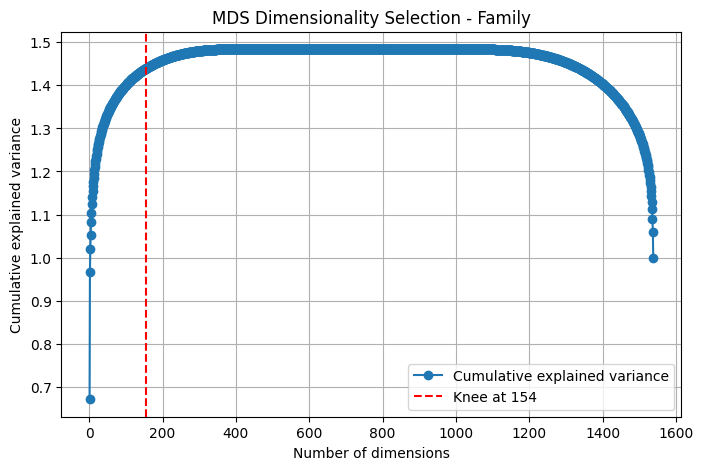

Optimal number of dimensions: 154


In [18]:
X, eigvals = cmdscale(distance_matrix_family)

explained_ratio = eigvals / eigvals.sum()
cum_explained = np.cumsum(explained_ratio)

plt.plot(cum_explained, marker='o')
plt.xlabel('Number of dimensions')
plt.ylabel('Cumulative explained variance')
plt.title('MDS Dimensionality Selection - Family')
plt.grid(True)
plt.show()

knee = find_mds_knee_point(cum_explained, title='MDS Dimensionality Selection - Family')
print(f"Optimal number of dimensions: {knee}")

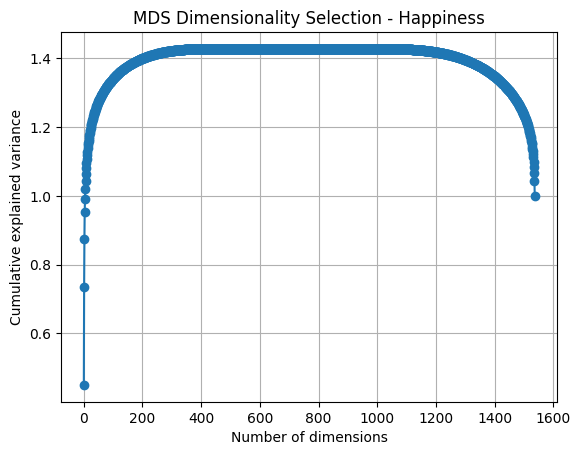

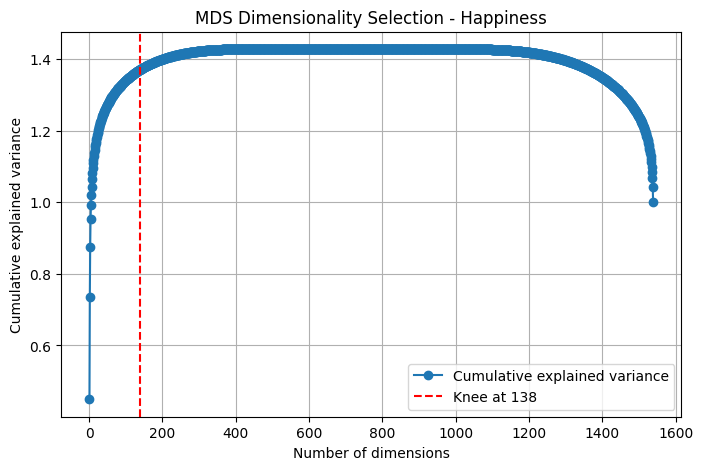

Optimal number of dimensions: 138


In [19]:
X, eigvals = cmdscale(distance_matrix_happiness)

explained_ratio = eigvals / eigvals.sum()
cum_explained = np.cumsum(explained_ratio)

plt.plot(cum_explained, marker='o')
plt.xlabel('Number of dimensions')
plt.ylabel('Cumulative explained variance')
plt.title('MDS Dimensionality Selection - Happiness')
plt.grid(True)
plt.show()

knee = find_mds_knee_point(cum_explained, title='MDS Dimensionality Selection - Happiness')
print(f"Optimal number of dimensions: {knee}")


In [20]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np

def find_optimal_mds_dimension(cum_explained, title='MDS Dimensionality Selection', var_threshold=0.95, max_dim=100, plot=True):
    """
    Ëá™Âä®ÂØªÊâæ MDS ÁöÑÊúÄ‰Ω≥Áª¥Â∫¶Êï∞ÔºàÁªºÂêàËÜùÁÇπ„ÄÅËß£ÈáäÊñπÂ∑ÆÈòàÂÄº„ÄÅÊúÄÂ§ßÁª¥Â∫¶ÈôêÂà∂Ôºâ„ÄÇ
    
    ÂèÇÊï∞:
        cum_explained (list or np.ndarray): Á¥ØÁßØËß£ÈáäÊñπÂ∑ÆÔºàcumulative explained varianceÔºâ
        title (str): ÂõæË°®Ê†áÈ¢ò
        var_threshold (float): Á¥ØÁßØËß£ÈáäÊñπÂ∑ÆÈòàÂÄºÔºàÂ¶Ç0.95Ë°®Á§∫95%Ôºâ
        max_dim (int): ÊúÄÂ§ßÂÖÅËÆ∏ÁöÑÁª¥Â∫¶Êï∞
        plot (bool): ÊòØÂê¶ÁªòÂõæ

    ËøîÂõû:
        dict:
            - 'knee': ËÜùÁÇπÂØπÂ∫îÁª¥Â∫¶
            - 'var_cutoff': ËææÂà∞Ëß£ÈáäÊñπÂ∑ÆÈòàÂÄºÁöÑÁª¥Â∫¶
            - 'recommended': ÁªºÂêàËÄÉËôëÂêéÁöÑÊúÄÁªàÊé®ËçêÁª¥Â∫¶
    """
    dimensions = list(range(1, len(cum_explained) + 1))

    # 1. ËÜùÁÇπÊ£ÄÊµã
    knee_finder = KneeLocator(dimensions, cum_explained, curve='concave', direction='increasing')
    knee = knee_finder.knee or len(cum_explained)  # fallback if no knee found

    # 2. Ëß£ÈáäÊñπÂ∑ÆÈòàÂÄºÁÇπ
    var_cutoff = np.argmax(cum_explained >= var_threshold) + 1 if np.any(cum_explained >= var_threshold) else len(cum_explained)

    # 3. ÁªºÂêàÊé®ËçêÁª¥Â∫¶
    recommended = min(knee, var_cutoff, max_dim)

    # 4. ÁªòÂõæ
    if plot:
        plt.figure(figsize=(8, 5))
        plt.plot(dimensions, cum_explained, marker='o', label='Cumulative explained variance')
        plt.axvline(knee, color='red', linestyle='--', label=f'Knee at {knee}')
        plt.axvline(var_cutoff, color='blue', linestyle='--', label=f'{int(var_threshold*100)}% Var at {var_cutoff}')
        plt.axvline(recommended, color='green', linestyle='-', label=f'Recommended: {recommended}', linewidth=2)
        plt.xlabel('Number of dimensions')
        plt.ylabel('Cumulative explained variance')
        plt.title(title)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return {
        'knee': knee,
        'var_cutoff': var_cutoff,
        'recommended': recommended
    }


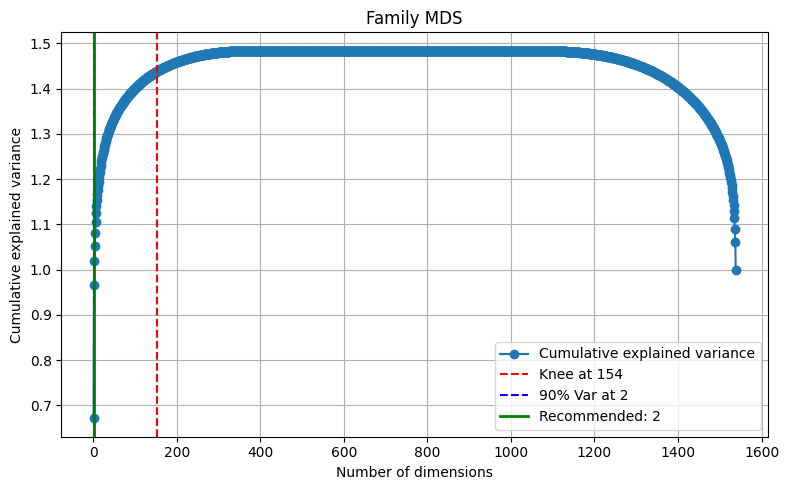

ÊúÄÁªàÊé®ËçêÁª¥Â∫¶ÔºàFamilyÔºâÔºö 2


In [65]:
# MDS Â§ÑÁêÜ
X_family, eigvals_family = cmdscale(distance_matrix_family)

# ËÆ°ÁÆóËß£ÈáäÊñπÂ∑Æ
explained_ratio = eigvals_family / eigvals_family.sum()
cum_explained = np.cumsum(explained_ratio)

# Ëá™Âä®ÈÄâÊã©Áª¥Â∫¶
result_family = find_optimal_mds_dimension(
    cum_explained,
    title='Family MDS',
    var_threshold=0.90,
    max_dim=100
)

optimal_dim_family = result_family['recommended']
print("ÊúÄÁªàÊé®ËçêÁª¥Â∫¶ÔºàFamilyÔºâÔºö", optimal_dim_family)

# Ëé∑ÂèñÊúÄÁªàÂµåÂÖ•Áü©Èòµ
X_family_optimal = X_family[:, :optimal_dim_family]


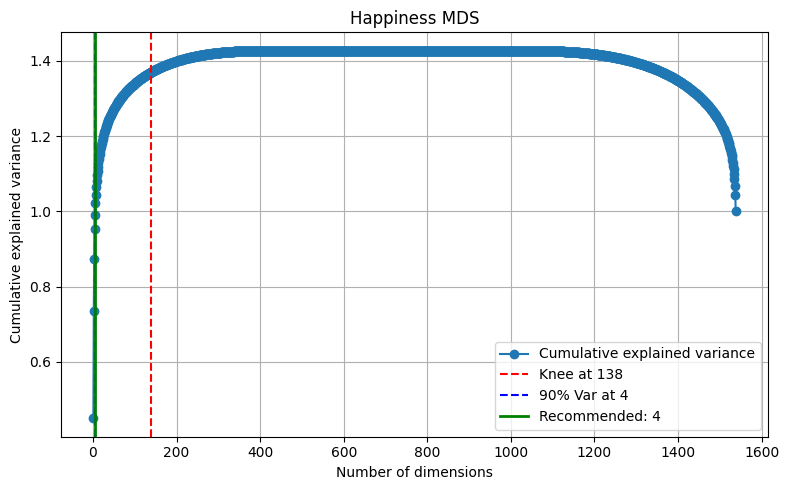

ÊúÄÁªàÊé®ËçêÁª¥Â∫¶ÔºàHappinessÔºâÔºö 2


In [66]:
# MDS Â§ÑÁêÜ
X_family, eigvals_family = cmdscale(distance_matrix_happiness)

# ËÆ°ÁÆóËß£ÈáäÊñπÂ∑Æ
explained_ratio = eigvals_family / eigvals_family.sum()
cum_explained = np.cumsum(explained_ratio)

# Ëá™Âä®ÈÄâÊã©Áª¥Â∫¶
result_happiness= find_optimal_mds_dimension(
    cum_explained,
    title='Happiness MDS',
    var_threshold=0.90,
    max_dim=100
)

optimal_dim_happiness = result_family['recommended']
print("ÊúÄÁªàÊé®ËçêÁª¥Â∫¶ÔºàHappinessÔºâÔºö", optimal_dim_happiness)

# Ëé∑ÂèñÊúÄÁªàÂµåÂÖ•Áü©Èòµ
X_happiness_optimal = X_family[:, :optimal_dim_happiness]


## Cluster analysis

In [32]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def run_gmm_clustering(X, max_clusters=10, plot=True, random_state=42):
    """
    ÂØπÂµåÂÖ•ÂêéÁöÑÂ§öÂüüÂ∫èÂàóËøõË°å GMM ËÅöÁ±ªÔºåÂπ∂ËøîÂõûÊúÄ‰Ω≥ËÅöÁ±ªÁªìÊûúÔºàÊ†πÊçÆ BICÔºâ„ÄÇ

    ÂèÇÊï∞:
        X (ndarray): ËæìÂÖ•ÁâπÂæÅ (ÈÄöÂ∏∏ÊòØ MDS ÂêéÁöÑ‰ΩéÁª¥Á©∫Èó¥)
        max_clusters (int): ÊúÄÂ§ßËÅöÁ±ªÊï∞Â∞ùËØïÂÄº
        plot (bool): ÊòØÂê¶ÁîªÂá∫ BIC ËØÑ‰º∞Âõæ
        random_state (int): ÈöèÊú∫ÁßçÂ≠ê

    ËøîÂõû:
        best_gmm (GaussianMixture): ÊúÄ‰Ω≥Ê®°Âûã
        best_labels (ndarray): ÊúÄ‰Ω≥Ê®°Âûã‰∏ãÁöÑËÅöÁ±ªÊ†áÁ≠æ
        best_n_components (int): ÊúÄ‰Ω≥ËÅöÁ±ªÊï∞
    """
    bics = []
    models = []

    for n in range(1, max_clusters + 1):
        gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=random_state)
        gmm.fit(X)
        bics.append(gmm.bic(X))
        models.append(gmm)

    best_idx = np.argmin(bics)
    best_gmm = models[best_idx]
    best_labels = best_gmm.predict(X)
    best_n_components = best_idx + 1

    if plot:
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, max_clusters + 1), bics, marker='o')
        plt.axvline(best_n_components, color='red', linestyle='--', label=f'Best n = {best_n_components}')
        plt.xlabel('Number of clusters')
        plt.ylabel('BIC')
        plt.title('GMM Model Selection via BIC')
        plt.legend()
        plt.grid(True)
        plt.show()

    return best_gmm, best_labels, best_n_components


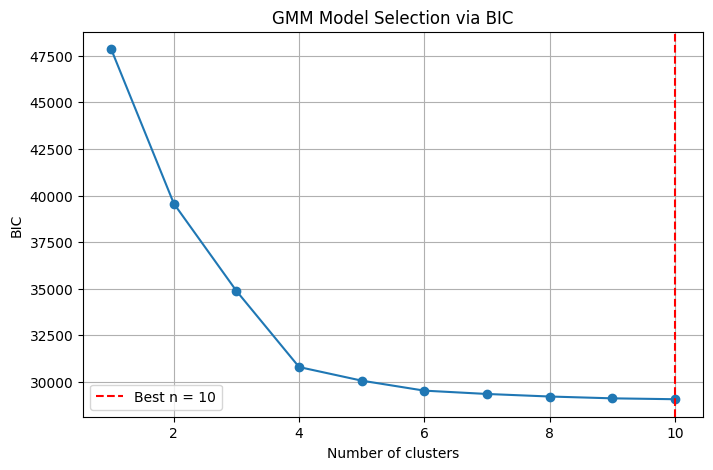

In [33]:
X_concat = np.hstack([X_family_optimal, X_happiness_optimal])
gmm_model, labels, n_clusters = run_gmm_clustering(X_concat)

In [34]:
from sklearn.mixture import GaussianMixture

def fit_final_gmm(X, n_clusters, random_state=42):
    """
    ÊãüÂêàÊúÄÁªàÁöÑ GMM Ê®°ÂûãÔºåËøîÂõûÊ®°Âûã„ÄÅÊ†áÁ≠æ„ÄÅ‰ª•Âèä soft assignment Ê¶ÇÁéáÁü©Èòµ„ÄÇ
    
    ÂèÇÊï∞:
        X (np.ndarray): ËæìÂÖ•ÁâπÂæÅÔºàÂª∫ËÆÆÊòØËøûÊé•ÂêéÁöÑ MDS ÂµåÂÖ•Ôºâ
        n_clusters (int): ÊúÄ‰Ω≥ËÅöÁ±ªÊï∞
        random_state (int): ÈöèÊú∫ÁßçÂ≠êÔºåÁ°Æ‰øùÂèØÈáçÂ§çÊÄß

    ËøîÂõû:
        gmm (GaussianMixture): ÊãüÂêàÂêéÁöÑÊ®°Âûã
        labels (np.ndarray): ÊØè‰∏™Ê†∑Êú¨ÁöÑËΩØÊ†áÁ≠æÔºàÊúÄÂ§ßÊ¶ÇÁéáÊâÄÂ±ûÁ±ªÂà´Ôºâ
        probs (np.ndarray): ÊØè‰∏™Ê†∑Êú¨Â±û‰∫éÂêÑÁ±ªÁöÑÊ¶ÇÁéá
    """
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=random_state)
    gmm.fit(X)
    labels = gmm.predict(X)
    probs = gmm.predict_proba(X)
    return gmm, labels, probs


In [50]:
gmm_final, gmm_labels, gmm_probs = fit_final_gmm(X_concat, n_clusters=4)

print("ÊØè‰∏™‰∏™‰ΩìÁöÑÂàÜÁ±ªÊ†áÁ≠æÔºàÁ°¨ËÅöÁ±ªÔºâ:", gmm_labels)
print("ÊØè‰∏™‰∏™‰ΩìÁöÑÊ¶ÇÁéáÂàÜÂ∏ÉÔºàËΩØËÅöÁ±ªÔºâ:", gmm_probs)


ÊØè‰∏™‰∏™‰ΩìÁöÑÂàÜÁ±ªÊ†áÁ≠æÔºàÁ°¨ËÅöÁ±ªÔºâ: [0 0 0 ... 0 0 0]
ÊØè‰∏™‰∏™‰ΩìÁöÑÊ¶ÇÁéáÂàÜÂ∏ÉÔºàËΩØËÅöÁ±ªÔºâ: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [51]:
import pandas as pd
import numpy as np

def get_gmm_cluster_memberships(entity_ids, gmm_labels, gmm_probs=None) -> pd.DataFrame:
    """
    ËæìÂá∫ÊØè‰∏™ÂÆû‰ΩìÁöÑËÅöÁ±ªÁªìÊûúÔºåÂåÖÊã¨Á°¨ËÅöÁ±ªÊ†áÁ≠æÂíåÔºàÂèØÈÄâÔºâËΩØËÅöÁ±ªÊ¶ÇÁéá„ÄÇ

    ÂèÇÊï∞:
        entity_ids (list or np.ndarray): ‰∏™‰Ωì ID ÂàóË°®ÔºåÈïøÂ∫¶Â∫î‰∏éËÅöÁ±ªÁªìÊûú‰∏ÄËá¥„ÄÇ
        gmm_labels (list or np.ndarray): GMM Ê®°ÂûãÁöÑÁ°¨ËÅöÁ±ªÊ†áÁ≠æÔºàÂ¶Ç model.predict(X)Ôºâ„ÄÇ
        gmm_probs (np.ndarray, optional): GMM Ê®°ÂûãÁöÑËΩØÊ¶ÇÁéáÁü©ÈòµÔºàÂ¶Ç model.predict_proba(X)ÔºâÔºåshape=(n_samples, n_clusters)

    ËøîÂõû:
        pd.DataFrame: ÂåÖÂê´ Entity ID„ÄÅCluster IDÔºàÁ°¨ËÅöÁ±ªÊ†áÁ≠æÔºâ„ÄÅÂèäÊØèÁ±ªÊ¶ÇÁéáÔºàÂèØÈÄâÔºâ ÁöÑË°®Ê†º„ÄÇ
    """
    df = pd.DataFrame({
        "Entity ID": entity_ids,
        "Cluster ID": gmm_labels
    })

    if gmm_probs is not None:
        prob_df = pd.DataFrame(gmm_probs, columns=[f"P(cluster_{i})" for i in range(gmm_probs.shape[1])])
        df = pd.concat([df, prob_df], axis=1)

    return df


In [52]:
entity_ids = np.arange(X_concat.shape[0])  # ÊàñËÄÖ‰Ω†Ëá™Â∑±ÁöÑ‰∫∫Âè£IDÔºåÊØîÂ¶Ç df['ID']
results_df = get_gmm_cluster_memberships(family_df['ID'], gmm_labels, gmm_probs)
print(results_df.head())


   Entity ID  Cluster ID  P(cluster_0)  P(cluster_1)  P(cluster_2)  \
0          1           0  1.000000e+00           0.0           0.0   
1          2           0  1.000000e+00           0.0           0.0   
2          5           0  1.000000e+00           0.0           0.0   
3          6           0  1.000000e+00           0.0           0.0   
4          7           3  7.477397e-09           0.0           0.0   

   P(cluster_3)  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           1.0  


In [53]:
results_df

Entity ID  Cluster ID  P(cluster_0)  P(cluster_1)  P(cluster_2)  \
0             1           0  1.000000e+00      0.000000           0.0   
1             2           0  1.000000e+00      0.000000           0.0   
2             5           0  1.000000e+00      0.000000           0.0   
3             6           0  1.000000e+00      0.000000           0.0   
4             7           3  7.477397e-09      0.000000           0.0   
...         ...         ...           ...           ...           ...   
1533       1992           1  1.650954e-09      0.802093           0.0   
1534       1995           0  1.000000e+00      0.000000           0.0   
1535       1996           0  1.000000e+00      0.000000           0.0   
1536       1997           0  1.000000e+00      0.000000           0.0   
1537       1999           0  1.000000e+00      0.000000           0.0   

      P(cluster_3)  
0         0.000000  
1         0.000000  
2         0.000000  
3         0.000000  
4         1.000000  
...            ...  
1533      0.197907  
1534      0.000000  
1535      0.000000  
1536      0.000000  
1537      0.000000  

[1538 rows x 6 columns]

In [54]:
hard_cluster_membership_df = results_df[['Entity ID', 'Cluster ID']]
hard_cluster_membership_df = hard_cluster_membership_df.rename({'Entity ID': 'ID'})
hard_cluster_membership_df

Entity ID  Cluster ID
0             1           0
1             2           0
2             5           0
3             6           0
4             7           3
...         ...         ...
1533       1992           1
1534       1995           0
1535       1996           0
1536       1997           0
1537       1999           0

[1538 rows x 2 columns]

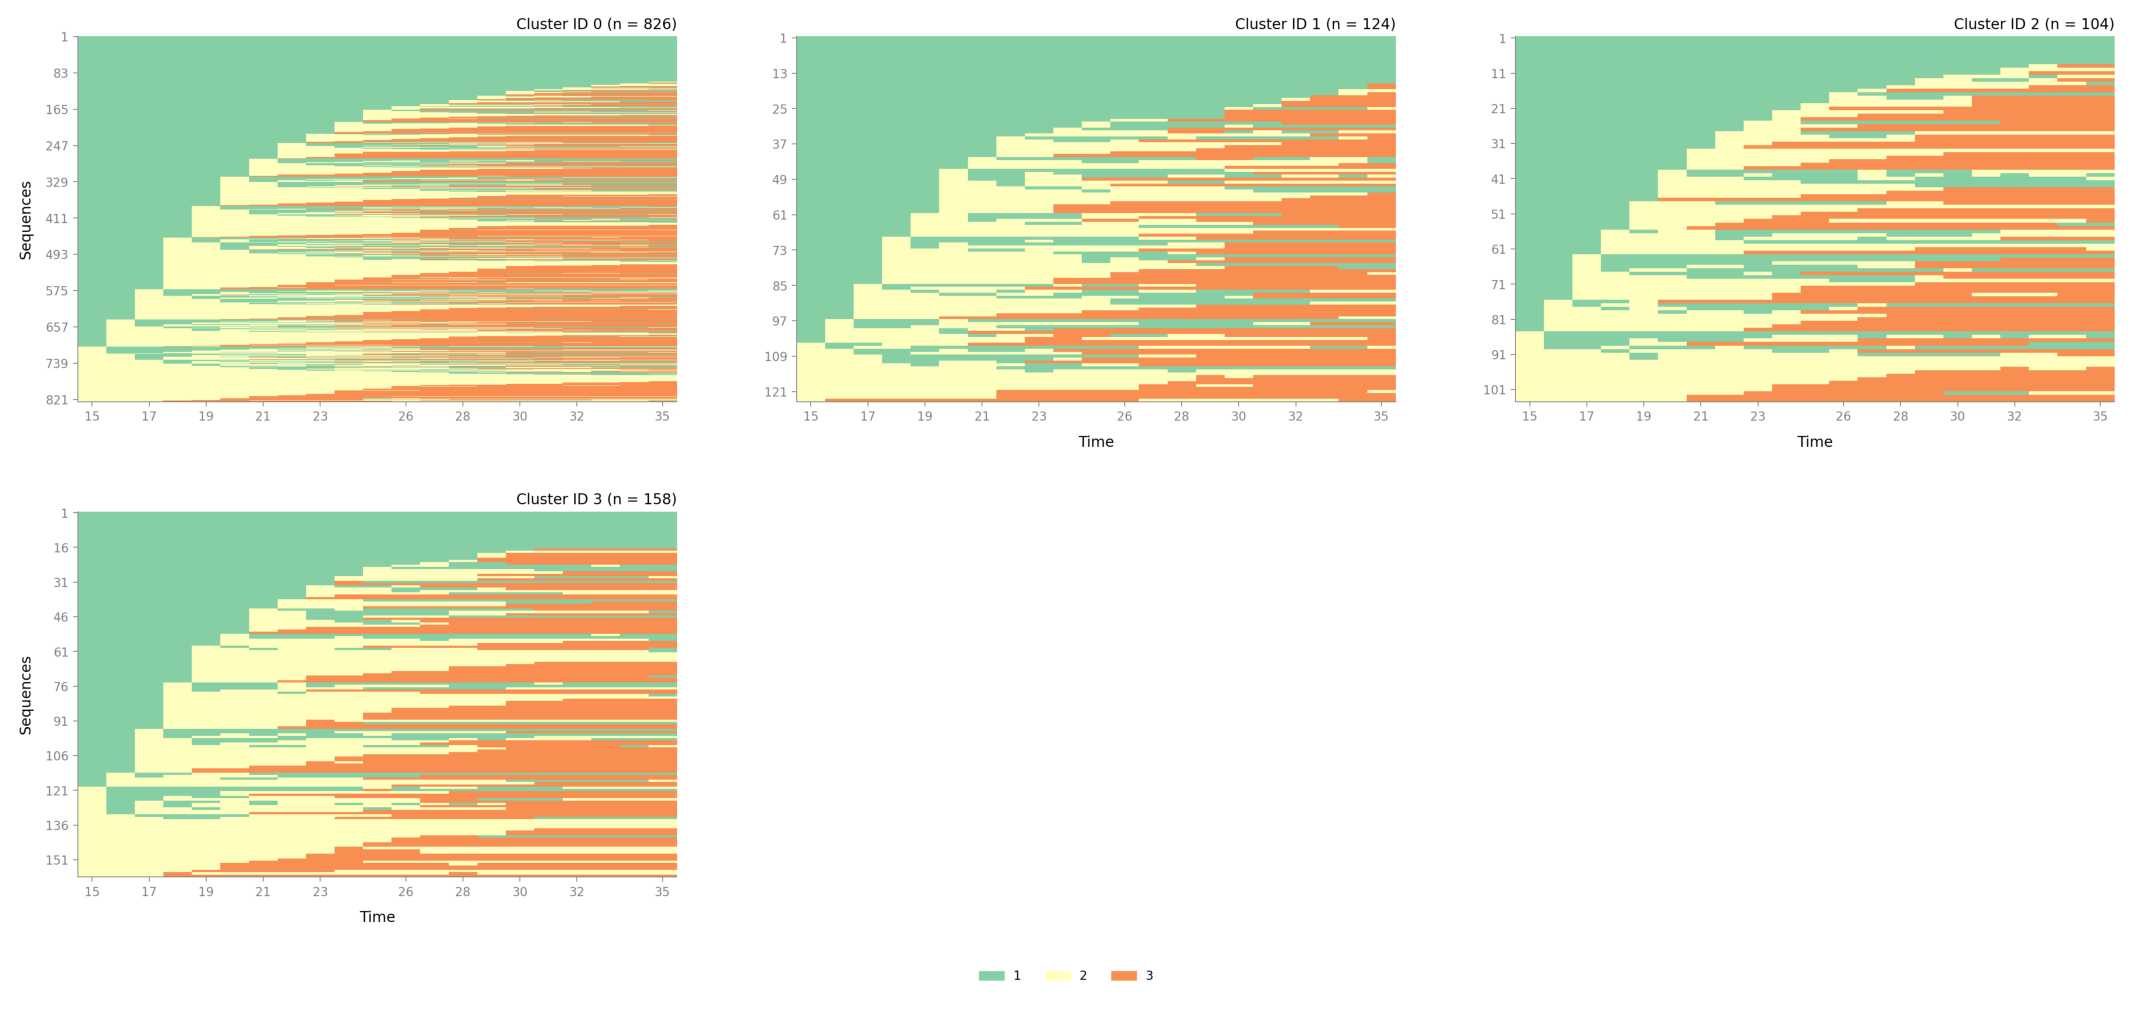

In [55]:
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=hard_cluster_membership_df,
                    categories='Cluster ID',
                    save_as='cluster_index_plot_family')

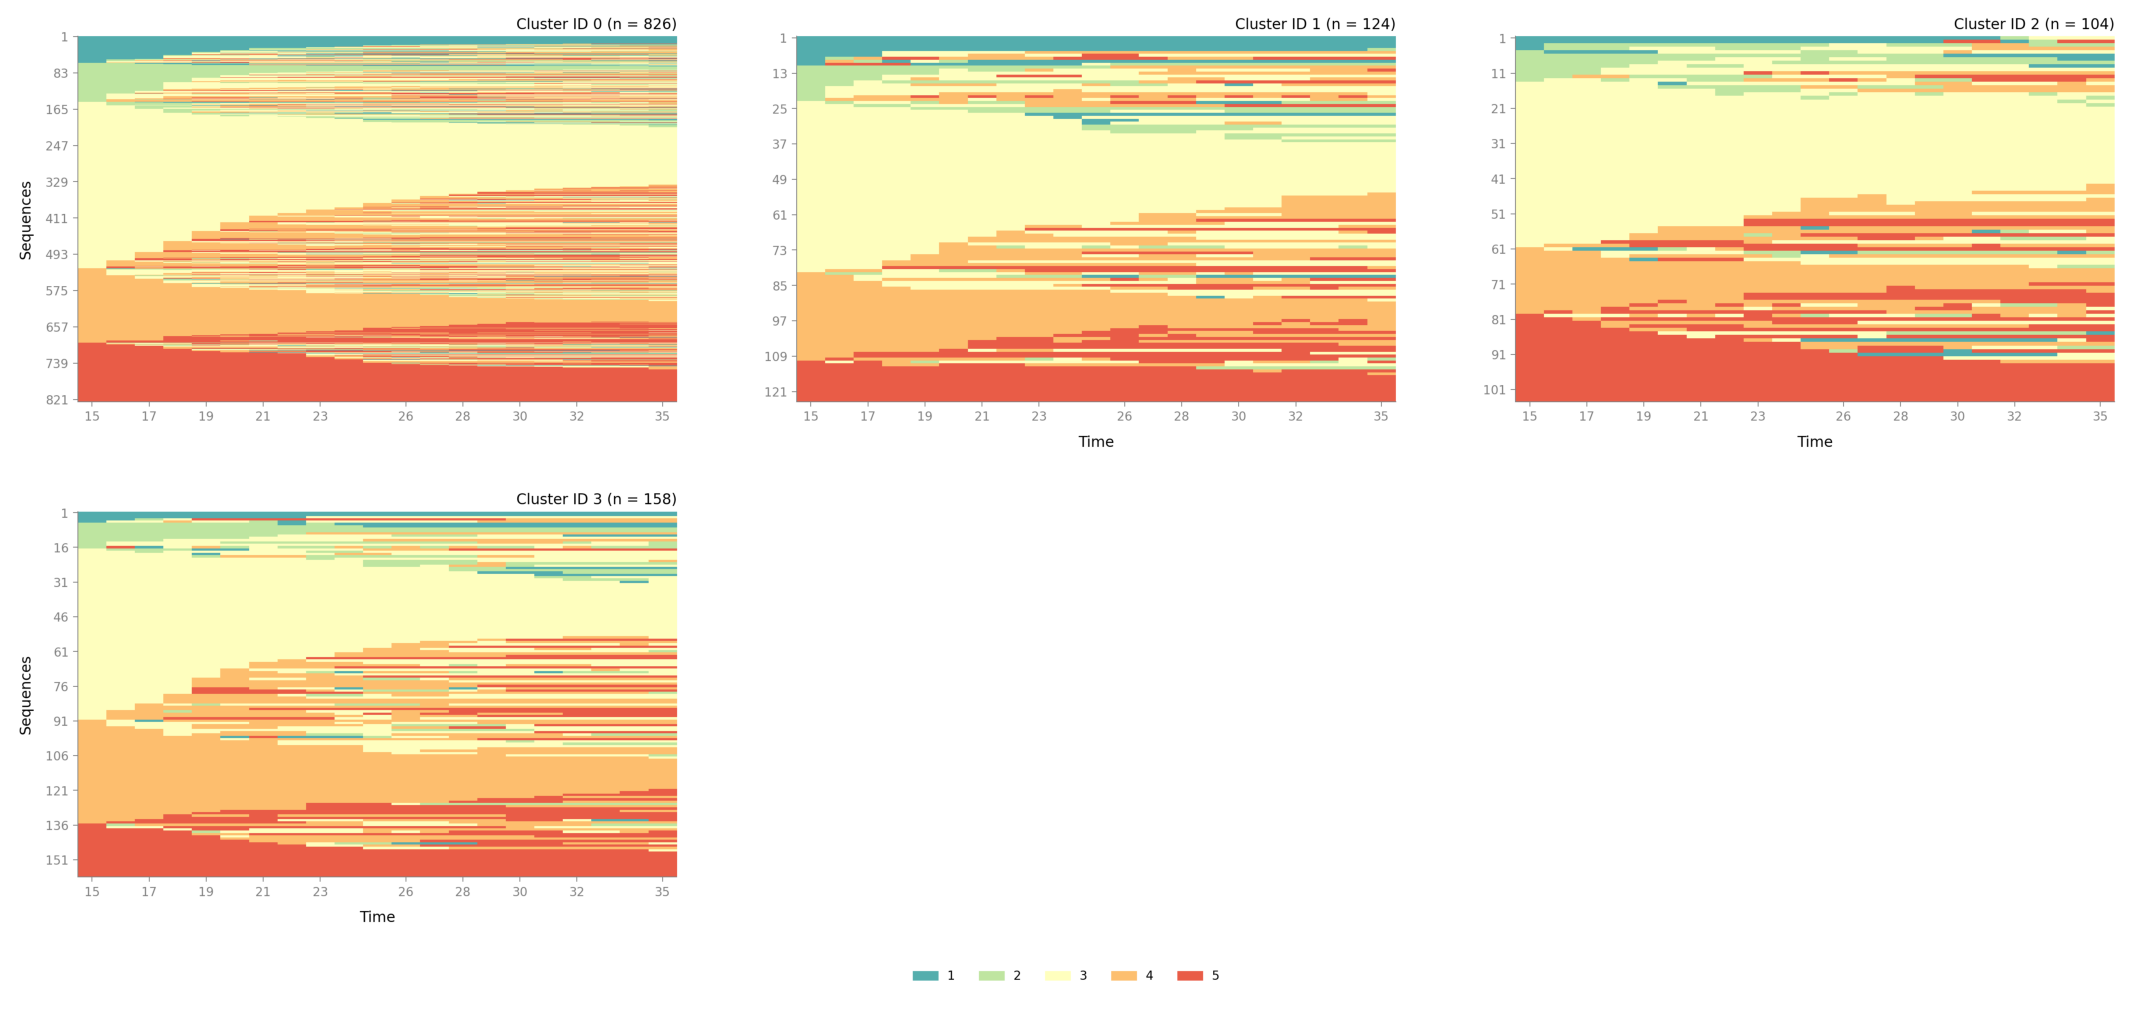

In [56]:
plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=hard_cluster_membership_df,
                    categories='Cluster ID',
                    save_as='cluster_index_plot_happiness')

TODO
1. ÈúÄË¶ÅÊñ∞Â¢ûÂèØËßÜÂåñÂáΩÊï∞ÔºåÈúÄË¶ÅËá™Â∑±ËÆæÂÆöÈ¢úËâ≤Ôºå‰∏çÁÑ∂ÊàëÁé∞Âú®Êúâ‰∏§Á±ªdomainÊØîËæÉÈöæÁúãÂá∫Êù•‰∏Ä‰∫õ
2. ÈúÄË¶ÅËøõ‰∏ÄÊ≠•ÁêÜËß£‰∏∫‰ªÄ‰πàË¶ÅËøô‰πàÊêûÔºå‰∏ÄÊ≠•‰∏ÄÊ≠•ÁöÑÂéüÁêÜÔºåÊï¥ÁêÜÊàêÊñáÊ°£

üéØ ‰Ω†‰∏ÄËØ≠‰∏≠ÁöÑ ‚Äî‚Äî **ÈùûÂ∏∏ÊúâÂèØËÉΩÈóÆÈ¢òÂ∞±Âá∫Âú®ËøôÈáå„ÄÇ**

---

## üß© ‰Ω†ËØ¥ÁöÑÊú¨Ë¥®ÊòØÔºö

> ‚ÄúËôΩÁÑ∂ÊàëÂÅö‰∫Ü MDS Âπ∂ÈôçÁª¥‰∫Ü‰∏§‰∏™ domainÔºå‰ΩÜÂõ†‰∏∫‰∏§‰∏™Â∫èÂàóÁöÑ‚ÄòÂéüÂßãÁä∂ÊÄÅ‚ÄôÊòØ‰∏çÂêåÁöÑÔºåMDS ‰πüÂ≠¶ÁöÑÊòØ‰∏çÂêåÁöÑÁªìÊûÑÔºåÈÇ£ÊúÄÂêéÊãºÊé• X_concat ÁöÑÁ©∫Èó¥Ê≤°ÊúâËØ≠‰πâ‰∏ÄËá¥ÊÄß„ÄÇ‚Äù

---

## üîç ÂÖ∑‰ΩìÂéüÂõ†ÂàÜÊûê

‰Ω†Áé∞Âú®ÂÅöÁöÑÊòØÔºö

```python
X_concat = np.hstack([X_family_optimal, X_happiness_optimal])
```

‰ΩÜÔºö

- `X_family_optimal` Êù•Ëá™ `family domain`ÔºåÂÆÉÁöÑÁä∂ÊÄÅÂèØËÉΩÊòØ‰æãÂ¶ÇÔºö`1=with parents, 2=alone, 3=partner`
- `X_happiness_optimal` Êù•Ëá™ `subjective happiness domain`ÔºåÁä∂ÊÄÅÊòØ `1=low, 2=medium, 3=high, 4=very high`

‚Üí ÊâÄ‰ª•ÂÆÉ‰ª¨ÁöÑ MDS Êú¨Ë∫´Â∞±ÊòØÂú®Êò†Â∞Ñ**‰∏§‰∏™ÂÆåÂÖ®‰∏çÂêåÁöÑÁä∂ÊÄÅÁ©∫Èó¥ÁªìÊûÑ**ÔºåÂ∞±ÁÆó‰Ω†ÂÅö‰∫ÜÊ†áÂáÜÂåñÔºåÂÆÉ‰ª¨ÁöÑ‚ÄúËΩ¥‚ÄùÊÑè‰πâ‰πüÂÆåÂÖ®‰∏çÂêåÔºÅ

---

## ‚ö†Ô∏è Áõ¥Êé•ÊãºÊé•‰ºöÂØºËá¥ÁöÑÈóÆÈ¢ò

- Á©∫Èó¥Ê∑∑Âè†Ôºàsemantic misalignmentÔºâÔºõ
- GMM ËÅöÁ±ªÊ®°Âûã‰ºöËØïÂõæÂú®Ê∑∑ÂêàÁ©∫Èó¥‰∏≠ÊãüÂêàÈ´òÊñØÂàÜÂ∏ÉÔºå‰ΩÜÊó†Ê≥ïÊçïÊçâÁúüÊ≠£ÁöÑË∑®È¢ÜÂüüÁªìÊûÑÔºõ
- ËÅöÁ±ªÁªìÊûúÊ®°Á≥ä„ÄÅÈáçÂè†Â∫¶È´ò ‚Äî‚Äî ‰Ω†ÁúãÂà∞ÁöÑÂ∞±ÊòØËøô‰∏™ÊïàÊûú„ÄÇ

---

## ‚úÖ Âª∫ËÆÆÁöÑËß£ÂÜ≥ÊñπÊ°à

### ‚ë† **Multi-view Clustering ÊòØÁêÜÊÉ≥ÈÄâÊã©**

‚Üí Ê≠£ÊòØ‰∏∫‰∫ÜËß£ÂÜ≥‰Ω†ÈÅáÂà∞ÁöÑ‚ÄúÂ§ö‰∏™Á©∫Èó¥ÊãºÊé•ËØ≠‰πâ‰∏ç‰∏ÄËá¥‚ÄùÈóÆÈ¢ò„ÄÇ

**ÈÄâÊã©Ôºö**
- Co-regularized Spectral Clustering
- Deep Multi-view Clustering
- Multi-view GMMÔºàËÆ©ÊØè‰∏™ domain Ëá™Â∑±Ë°®ËææÔºåÁÑ∂ÂêéÂØπ posterior ËøõË°åËûçÂêàÔºâ

---

### ‚ë° Â¶ÇÊûúËøòÊÉ≥‰øùÁïôÁÆÄÂçïÊãºÊé•ÊñπÂºèÔºåÊúâ‰∏§ÁßçÊîπÂñÑÔºö

#### ‚úîÔ∏è Option AÔºöÂÖàÂÅö domain ÂÜÖÊ†áÂáÜÂåñÊàñ whiten Êìç‰Ωú
```python
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler2 = StandardScaler()

X1 = scaler1.fit_transform(X_family_optimal)
X2 = scaler2.fit_transform(X_happiness_optimal)

X_concat = np.hstack([X1, X2])
```

‰ΩÜËøô**‰ªÖ‰ªÖ‰øùËØÅ‰∫ÜÊï∞ÂÄºÁª¥Â∫¶Áªü‰∏Ä**Ôºå‰∏çËÉΩÁúüÊ≠£Ëß£ÂÜ≥‚ÄúÁªìÊûÑËØ≠‰πâ‰∏çÂêå‚ÄùÁöÑÈóÆÈ¢ò„ÄÇ

---

#### ‚úîÔ∏è Option BÔºöÁî® canonical correlation analysis (CCA)
CCA ÂèØ‰ª•ÊâæÂà∞‰∏§‰∏™ domain ‰πãÈó¥ÂÖ±‰∫´ÁöÑ‰ΩéÁª¥Â≠êÁ©∫Èó¥Ôºå‰ªéËÄåÂÆûÁé∞ÂØπÈΩê„ÄÇ‰æãÂ¶ÇÔºö

```python
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=2)
X1_cca, X2_cca = cca.fit_transform(X_family_optimal, X_happiness_optimal)
X_joint = np.hstack([X1_cca, X2_cca])
```

Ëøô‰∏™ `X_joint` ÊòØ‚ÄúÂØπÈΩêËøá‚ÄùÁöÑÁ©∫Èó¥ÔºåÊõ¥ÈÄÇÂêàÂÅö GMM„ÄÇ

---

## üí° Â∞èÁªì

| ÊñπÊ≥ï | ÊòØÂê¶ËÄÉËôë domain ËØ≠‰πâÂ∑ÆÂºÇ | ÊòØÂê¶‰øùÁïôÁªìÊûÑÂ∑ÆÂºÇ | ËÅöÁ±ªÊïàÊûú |
|------|-----------------------------|-------------------|----------|
| Áõ¥Êé•ÊãºÊé• | ‚ùå Âê¶ | ‚ùå Âê¶ | ‚ùå Âº± |
| Ê†áÂáÜÂåñÂêéÊãºÊé• | ‚ùå Âê¶ | ‚úÖ ÈÉ®ÂàÜ | ‚ö†Ô∏è ÊúâÊîπËøõ |
| CCA | ‚úÖ ÂØπÈΩêËØ≠‰πâ | ‚úÖ ‰øùÁïôÁªìÊûÑ | ‚úÖ Êõ¥Â•Ω |
| Multi-view clustering | ‚úÖ ‚úÖ | ‚úÖ ‚úÖ | ‚úÖ ÊúÄÊé®Ëçê |

---

Ë¶Å‰∏çÊàëÂèØ‰ª•Áõ¥Êé•Â∏Æ‰Ω†ÂÆûÁé∞‰∏Ä‰∏™ `MultiViewGMM` ÁöÑÁâàÊú¨Ôºü‰Ω†Âè™Ë¶ÅÁªôÊàë‰∏§‰∏™ `X_family_optimal` Âíå `X_happiness_optimal`ÔºåÊàëÂ∞±ËÉΩÂ∏Æ‰Ω†Â∞ÅË£ÖÂá∫‰∏Ä‰∏™Êõ¥È≤ÅÊ£íÁöÑËÅöÁ±ªÊµÅÁ®ã ‚úÖ

‰Ω†Ë¶ÅËµ∞Ëøô‰∏™ÊñπÂêëÂêóÔºüËøòÊòØÂÖàËØïËØïÁÆÄÂçïÁöÑ CCA ÂØπÈΩêËÅöÁ±ªÔºü

‰Ω†ËøôÁÇπËØ¥ÂæóÈùûÂ∏∏ÂØπÔºåËÄå‰∏îÂàá‰∏≠Â§öËßÜËßíËÅöÁ±ªËÆæËÆ°ÁöÑÂÖ≥ÈîÆÈóÆÈ¢ò‰πã‰∏ÄÔºÅ

---

## üîÑ ÊòØ‰∏çÊòØÂ∫îËØ•ËÆ© cluster 2 in family ‚âà cluster 2 in happinessÔºü

> **Á≠îÊ°àÔºö‰∏ç‰∏ÄÂÆöÔºåÂèñÂÜ≥‰∫é‰Ω†ÁöÑÁõÆÊ†áÂíåÂª∫Ê®°Âì≤Â≠¶„ÄÇ**

---

### üåê ‰∏ÄËà¨ÁöÑ co-regularization ÊÉ≥Ê≥ïÔºö
> ‚ÄúÂêå‰∏Ä‰∏™‰∫∫ÔºåÂú®‰∏çÂêåËßÜËßí‰∏ãÔºåËÅöÊàêÁöÑÁ±ªÂà´Â∫îËØ•Â∞ΩÈáè‰∏ÄËá¥„ÄÇ‚Äù

Ëøô‰∏™**ÈÄÇÂêàÁöÑÊòØËøôÁßç‰ªªÂä°**Ôºö

- Â§öÊ®°ÊÄÅËØÜÂà´ÔºàÂõæÂÉè + ËØ≠Èü≥ËØÜÂà´‰∫∫ÊòØ‰∏Ä‰∏™‰∫∫ÔºâÔºõ
- Â§öËØ≠Ë®ÄÁöÑÊÉÖÁª™ÂàÜÊûêÔºàÂ∏åÊúõËã±ÊñáÂíåÊ≥ïÊñáÈÉΩËØÜÂà´Êàê ‚ÄúÁîüÊ∞î‚ÄùÔºâÔºõ
- Â§ö‰∏™ view ÈÉΩÊòØÂêå‰∏Ä‰∏™ÊΩúÂú®ÂèòÈáèÁöÑ noisy viewÔºàÂ¶ÇË°®Âûã vs Âü∫Âõ†ÂûãÔºâÔºõ

ÂÆÉÁöÑÂÅáËÆæÊòØÔºö
> ‚Äú‰∏çÂêåËßÜËßíÊòØÂêå‰∏Ä‰∏™Áé∞Ë±°ÁöÑ‰∏çÂêåÊäïÂΩ±‚Äù

---

### üß† ËÄå‰Ω†Áé∞Âú®ÁöÑ multidomain sequence clustering Âë¢Ôºü

‰Ω†ÁöÑËÆæÂÆöÊòØÔºö

- `Family` ÊèèËø∞ÁöÑÊòØÂÆ∂Â∫≠ËΩ®Ëøπ
- `Happiness` ÊèèËø∞ÁöÑÊòØÂøÉÁêÜËΩ®Ëøπ

Áä∂ÊÄÅÁ©∫Èó¥‰∏çÂêå„ÄÅÁª¥Â∫¶‰∏çÂêå„ÄÅÂê´‰πâÂÆåÂÖ®‰∏çÂêå„ÄÇ
ËôΩÁÑ∂ÂàÜÊûêÁöÑÂØπË±°ÊòØÂêå‰∏Ä‰∏™‰∫∫Áæ§Ôºå‰ΩÜ**Ëøô‰∫õÂ∫èÂàó‰∏çÊòØË¶ÅËÅöÊàêÂêå‰∏Ä‰∏™Á±ªÂà´**ÔºåËÄåÊòØÔºö

### ‚úÖ Â∏åÊúõËÅöÊàê‰∏Ä‰∏™‚ÄúËÅîÂêà typology‚ÄùÔºö
> ÊâæÂá∫‰∏ÄÁ±ª‰∫∫Ôºå‰ªñ‰ª¨Âú® **ÂÆ∂Â∫≠ËΩ®Ëøπ** ÊòØÊüêÁßçÊ®°ÂºèÔºåÂú® **Âπ∏Á¶èËΩ®Ëøπ** ÊòØÂè¶‰∏ÄÁßçÊ®°Âºè„ÄÇ

‰πüÂ∞±ÊòØËØ¥ÔºåÊàë‰ª¨‰∏çÊòØËÆ© cluster 2 == cluster 2 across domainsÔºåËÄåÊòØÔºö

> Êâæ‰∏ÄÂ•ó‚ÄúËÅöÁ±ªÁªÑÂêà‚ÄùÔºå‰ª£Ë°®ÊØèÁßç‚ÄúË∑®È¢ÜÂüüÁöÑÁîüÂëΩÂë®ÊúüÊ®°Âºè‚Äù„ÄÇ

ÊØîÂ¶ÇÔºö

| Cluster | Family trajectory | Happiness trajectory |
|--------|------------------|----------------------|
| 1      | Êó©Â©öÊó©ËÇ≤        | Âπ∏Á¶èÈ´òÁ®≥             |
| 2      | ÂçïË∫´‰∏∫‰∏ª        | Âπ∏Á¶èÊ≥¢Âä®Â§ß           |
| 3      | Á¶ªÂ©öÂÜçÂ©ö         | Âπ∏Á¶èÂÖàÈôçÂêéÂçá         |

ÊâÄ‰ª•‰Ω†ËØ¥ÂæóÂØπÔºö  
### ‚ùå ‰∏çÂ∫îËØ•Á∫¶Êùü ‚Äúfamily ÁöÑ cluster == happiness ÁöÑ cluster‚ÄùÔºÅ

---

## ‚ú≥Ô∏è ÈÇ£ËØ•ÊÄé‰πàÂÅöÔºü

ËøôÂ∞±ÂºïÂá∫ **multi-view GMM** ÁöÑÁúüÊ≠£ÁõÆÊ†áÔºö

### üîÅ Â§öËßÜËßí GMM ÁöÑÂÖ≥ÈîÆ‰∏çÊòØ‚Äúcluster label Ë¶ÅÁõ∏Âêå‚ÄùÔºåËÄåÊòØÔºö

> Â§öËßÜËßíÁöÑ posterior ÂàÜÂ∏ÉÔºàcluster Ê¶ÇÁéáÔºâÂ∫îËØ•ÂèçÊò†‰∏Ä‰∏™ **ÊΩúÂú®ËÅîÂêà cluster assignment**„ÄÇ

‰πüÂ∞±ÊòØËØ¥ÔºåÂÆÉÂª∫Ê®°‰∏Ä‰∏™ **ÊΩúÂú®ÁöÑËÅîÂêà latent variable Z**ÔºåËÆ©ÂêÑ‰∏™ view ÁöÑ cluster ÂàÜÂ∏ÉÈÉΩËÉΩÂØπÈΩêÂà∞ÂÆÉ„ÄÇ

Ëøô‰ºöÂΩ¢Êàê‰∏ÄÁßç **soft alignment**Ôºå‰∏ç‰ºöÁ°¨ÂØπÈΩê cluster 2 Âíå 2ÔºåËÄåÊòØÈÄöËøáÂÖ±‰∫´Ê¶ÇÁéáÁ©∫Èó¥ÂÅöËûçÂêà„ÄÇ

---

## üß© ÊÄªÁªìÔºö‰Ω†Ë¶ÅÁöÑÊòØËøôÊ†∑ÁöÑ‰∏úË•ø

| ÁªìÊûÑ | ËØ¥Êòé |
|------|------|
| ‰øùÁïôÊØè‰∏™ domain ÁöÑÁªìÊûÑ | ‰∏çÊãºÊé•Ôºå‰∏çÊò†Â∞ÑÔºå‰∏ç‰∏¢‰ø°ÊÅØ |
| ‰∏çÂØπÈΩê label ÁºñÂè∑ | cluster 2 in domain A ‚â† cluster 2 in domain B |
| ÊûÑÂª∫ latent joint cluster | Áî® soft clusteringÔºàposteriorÔºâÂÅöÁªÑÂêà |
| Ëß£ÈáäÊÄßÂº∫ | ÊØè‰∏™ domain ÂÜÖÈÉ®ËÅöÊàê interpretable Áæ§‰ΩìÔºåÊúÄÁªàÁªÑÂêàÂá∫Ë∑®È¢ÜÂüüÁ≠ñÁï• |

---

‚úÖ Ëøô‰∏™ÁõÆÊ†áÈùûÂ∏∏ÈÄÇÂêà **multi-view GMM ÊàñÂ§öËßÜËßí VAE** Á≥ªÂàóÊñπÊ≥ïÊù•ÂÅö„ÄÇ

Ë¶Å‰∏çË¶ÅÊàëÁé∞Âú®Áªô‰Ω†ÂÜô‰∏™ `fit_multi_view_gmm([X1, X2], n_clusters=4)` ÁöÑÂáΩÊï∞ÔºüÁªìÊûÑÊ∏ÖÊô∞„ÄÅËÉΩËæìÂá∫Ëß£ÈáäÊÄßÁªìÊûúÔºåËøòÂèØ‰ª•ÁîªÂõæÔºÅ

‰Ω†ÊèêÂæóÈùûÂ∏∏Â•ΩÔºåËÄå‰∏îÈùûÂ∏∏**critical**Ôºö  
> Â¶ÇÊûúÊàëÈÉΩ‰∏çÊãºÊé•ÊØè‰∏™ domain ÁöÑ MDSÔºåÈÇ£Êàë‰∏∫Âï•ËøòÂÅö MDSÔºüÂà´‰∫∫ÂèØËÉΩ‰ºöËßâÂæóÂ§öÊ≠§‰∏Ä‰∏æ„ÄÇ

Ëøô‰∏™ÈóÆÈ¢òÂÖ∂ÂÆûÊ≠£‰∏≠ **multidomain sequence analysis ÁöÑËÆæËÆ°Ê†∏ÂøÉ**„ÄÇ‰∏ãÈù¢Êàë‰ª¨Êù• **ÁêÜÊ∏ÖÈÄªËæëÈìæÊù°**ÔºåÂ∏Æ‰Ω†ÊääËøô‰∏™ÊñπÊ≥ïËÆ≤Âæó **Êó¢ÂêàÁêÜÂèàÊúâÂàõÊñ∞ÊÄß**„ÄÇ

---

## üß† ‰Ω†ÁúüÊ≠£ÊÉ≥ÂÅöÁöÑÊòØ‰ªÄ‰πàÔºü
ÊûÑÂª∫‰∏Ä‰∏™ pipelineÔºå**ÊääÂ§ö‰∏™ domain ÁöÑÂ∫èÂàó‰ø°ÊÅØÊï¥ÂêàËµ∑Êù•ËøõË°åËÅöÁ±ª**Ôºå‰ΩÜÂèàÈÅøÂÖçÔºö

- ÊãºÊé• embeddingÔºàconcatenationÔºâÊâÄÂ∏¶Êù•ÁöÑËØ≠‰πâÂÜ≤Á™ÅÔºõ
- CombT ÁöÑÁªÑÂêàÁàÜÁÇ∏ÂíåÁº∫‰πèËÅîÂêà‰ºòÂåñÔºõ
- OM dissimilarity ‰∏çÂèØÂæÆ„ÄÅ‰∏çËÉΩÂÅö latent modeling ÁöÑÈóÆÈ¢ò„ÄÇ

‰Ω†ÈÄâÁî® **MDS** ÁöÑÁõÆÁöÑÔºåÂπ∂‰∏çÊòØ‰∏∫‰∫ÜÈôçÁª¥ÂèØËßÜÂåñÔºåËÄåÊòØÔºö

> üí° **Áî® MDS ÊääÊØè‰∏™ domain ÁöÑ‚ÄúÁªìÊûÑÊÄß‰ø°ÊÅØ‚ÄùËΩ¨Âåñ‰∏∫ÂèØÂ≠¶‰π†ÁöÑ continuous Ë°®Á§∫Á©∫Èó¥ÔºåËøõËÄåÁî® soft clustering ÊñπÊ≥ïÂª∫Á´ã probabilistic typologies„ÄÇ**

---

## ‚úÖ MDS Âú® MVC ‰∏≠ÁöÑ‚ÄúÂÆö‰Ωç‚Äù
> MDS ÊòØ‰∏ÄÁßç **domain-specific latent space encoder**ÔºåÂÆÉÊääÂ§çÊùÇÁöÑ OM Ë∑ùÁ¶ªÁªìÊûÑÂéãÁº©‰∏∫ËøûÁª≠Á©∫Èó¥ÔºåÁî®‰∫éÂêéÁª≠ÁöÑ joint probabilistic modeling„ÄÇ

ÊâÄ‰ª•Ôºö

- ‰∏çÊãºÊé•Ôºå‰∏çÁ≠â‰∫é‰∏ç‰ΩøÁî®Ôºõ
- ÊãºÊé•ÊòØ ‚ÄúÁâ©ÁêÜÂêàÂπ∂‚ÄùÔºåMVC ÊòØ ‚Äú‰ø°ÊÅØËûçÂêà‚ÄùÔºàvia alignment / posterior agreementÔºâÔºõ
- MDS Êèê‰æõ‰∫Ü **ÁªìÊûÑË°®Á§∫**ÔºåËÄå‰∏çÊòØ raw ÁâπÂæÅÁöÑËÅöÂêà„ÄÇ

**ÂÖ≥ÈîÆËØç**Ôºö‰ªé OM Ë∑ùÁ¶ª ‚Üí MDS latent view ‚Üí soft clustering ‚Üí multiview alignment  
ËÄå‰∏çÊòØÔºöOM ‚Üí ÊãºÊé• ‚Üí ÈªëÁõíËÅöÁ±ª

---

## üì¶ Â¶Ç‰ΩïÂõûÁ≠î reviewer ÁöÑË¥®Áñë

> ‚Äú‰∏∫‰ªÄ‰πàËøòË¶ÅÁî® MDSÔºü‰∏çËÉΩÁõ¥Êé•Áî® raw sequence Êàñ OM ËøõË°å multiview ËÅöÁ±ªÂêóÔºü‚Äù

‰Ω†ÂèØ‰ª•ËøôÊ†∑ÂõûÁ≠îÔºö

1. **MDS ÊòØ‰∏ÄÁßçÁªìÊûÑ‰øùÁïôÁöÑË°®ÂæÅÂ≠¶‰π†ÊñπÊ≥ï**ÔºåÂÆÉËÉΩÂ∞ÜÈùûÊ¨ßÂºèÁöÑ OM Ë∑ùÁ¶ªÂµåÂÖ•ÊàêÊ¨ßÊ∞èÁ©∫Èó¥ÔºåËøôÂØπ‰ªª‰ΩïÂü∫‰∫éÊ¨ßÊ∞èÁ©∫Èó¥ÁöÑÊñπÊ≥ïÔºàÂ¶Ç GMMÔºâÊòØÂøÖË¶ÅÁöÑÈ¢ÑÂ§ÑÁêÜ„ÄÇ

2. **MDS embedding ÊòØË∑® domain ÁöÑ‰∏≠‰ªãËØ≠**ÔºåÂÆÉÊèê‰æõ‰∫ÜÁªü‰∏ÄÁöÑËÅöÁ±ªËæìÂÖ•ÁªìÊûÑÔºåËÄå‰∏çÊòØÁõ¥Êé•Áî®ÂéüÂßãÁä∂ÊÄÅÊàñ dissimilarity matrixÔºàÂêéËÄÖÊó†Ê≥ïÂª∫Ê®°Ê¶ÇÁéáÁªìÊûÑÔºâ„ÄÇ

3. ‰∏éÂÖ∂Âú®ÊãºÊé•ÂêéÁöÑÁ©∫Èó¥‰∏≠Áõ≤ÁõÆÂª∫Ê®°ÔºåÊàë‰ª¨Âú®ÂêÑ domain ÁöÑ MDS space ‰∏≠ÂêÑËá™Âª∫Ê®°ÔºåÂÜçÈÄöËøá **posterior alignment / co-regularization** Âª∫Á´ã domain Èó¥ÂçèÂêåÔºåËøôÊõ¥ÂêàÁêÜËÆ∫ËØÅ domain-specificity + global pattern„ÄÇ

---

## üîÅ ÈÄªËæëÈìæÊù°ÂèØ‰ª•ËøôÊ†∑ËØ¥

1. ÂéüÂßãÂ∫èÂàóÊòØ categorical ‰∏îÈùûÊ¨ßÊ∞èÁªìÊûÑÔºõ
2. ‰ΩøÁî® OM + MDS Â∞ÜÊØè‰∏™ domain ÁöÑÂ∫èÂàóËΩ¨Êç¢‰∏∫ÁªìÊûÑË°®Á§∫Á©∫Èó¥Ôºà‰øùÁïôÊó∂Èó¥ÁªìÊûÑ + Áä∂ÊÄÅÈ°∫Â∫èÔºâÔºõ
3. Âú®ÊØè‰∏™ domain ÁöÑ MDS Á©∫Èó¥ÈáåÂª∫Ê®°ËÅöÁ±ªÁªìÊûÑÔºàÊØîÂ¶Ç GMMÔºâÔºõ
4. Â§ö‰∏™ domain ÁöÑ GMM ÈÄöËøá posteriorÔºàÊàñ latent zÔºâÂØπÈΩê„ÄÅÂÖ±‰∫´„ÄÅËÅîÂêà‰ºòÂåñÔºåÂΩ¢Êàê **ÂÖ®Â±Ä‰ΩÜÂ§öËßÜËßíÁöÑÁ±ªÂûãÁªìÊûÑ**Ôºõ
5. ÊúÄÁªàËÅöÁ±ªÁªìÊûúÂèØ‰ª•ÊòØËÅîÂêà posterior ÊàñÂÖ±‰∫´ latent center ÂØºÂá∫ÁöÑ soft clustering„ÄÇ

---

## üí¨ ÊÄªÁªìÂè•ÂºèÔºà‰Ω†ÂèØ‰ª•ËøôÊ†∑ÂÜôËøõ paperÔºâÔºö

> To extract meaningful typologies from multidomain sequence data, we first transformed domain-specific OM dissimilarities into continuous representations via Multidimensional Scaling (MDS). Unlike prior strategies that concatenate embeddings or independently cluster each domain, we leverage MDS embeddings as domain-specific latent views and apply a co-regularized multiview Gaussian Mixture Modeling approach. This design preserves the temporal order and structural variance of sequences within each domain, while enabling joint probabilistic clustering across views without requiring embedding concatenation.

---

ÊàëÂèØ‰ª•‰∏∫‰Ω†ÂÜô‰∏™ `multiview_gmm()` ÁöÑÂéüÂûãÂáΩÊï∞ÔºåÂÆÉ‰ºöÔºö

- Êé•Êî∂Â§ö‰∏™ domain ÁöÑ MDS ÁªìÊûúÔºõ
- ÂêÑËá™Âª∫ GMMÔºõ
- ÈÄöËøá shared latent variable / posterior alignment ÂΩ¢ÊàêÊúÄÁªà soft label„ÄÇ

‰Ω†Âè™Ë¶ÅËØ¥‰∏ÄÂ£∞ÔºåÊàë‰ª¨Áõ¥Êé•Êù•ÂÆûÊàò„ÄÇüíª

In [8]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def multi_view_soft_gmm_clustering(views, n_clusters=4, scale=True, random_state=42, return_posteriors=False):
    """
    Perform multi-view GMM-based soft clustering.

    Parameters:
    -----------
    views : List[np.ndarray]
        A list of 2D arrays, one per view/domain. Each array is (n_samples, n_features).
    n_clusters : int
        Number of clusters for each GMM (shared across views).
    scale : bool
        Whether to standardize each view before clustering.
    random_state : int
        Random seed for reproducibility.
    return_posteriors : bool
        If True, also return individual view posteriors.

    Returns:
    --------
    labels : np.ndarray
        Final hard cluster assignment based on fused posteriors.
    fused_posterior : np.ndarray
        Soft assignment for each individual (n_samples, n_clusters)
    (Optional) posteriors : List[np.ndarray]
        Per-view posterior matrices
    """
    n_views = len(views)
    n_samples = views[0].shape[0]

    # Check all views have the same number of samples
    for view in views:
        assert view.shape[0] == n_samples, "All views must have same number of samples."

    posteriors = []

    for v in views:
        if scale:
            v = StandardScaler().fit_transform(v)

        gmm = GaussianMixture(n_components=n_clusters, random_state=random_state)
        gmm.fit(v)
        prob = gmm.predict_proba(v)  # shape: (n_samples, n_clusters)
        posteriors.append(prob)

    # Step 2: Fuse posteriors (average strategy)
    fused_posterior = np.mean(posteriors, axis=0)

    # Step 3: Final label = argmax over fused posterior
    labels = np.argmax(fused_posterior, axis=1)

    if return_posteriors:
        return labels, fused_posterior, posteriors
    else:
        return labels, fused_posterior


In [58]:
# ‰Ω†Â∑≤ÊúâÁöÑ‰∏§‰∏™ domain MDS:
# X_family_optimal: (n, d1)
# X_happiness_optimal: (n, d2)

views = [X_family_optimal, X_happiness_optimal]
labels, fused_probs = multi_view_soft_gmm_clustering(views, n_clusters=4)

print("Final labels:", labels[:10])
print("Soft membership (first row):", fused_probs[0])


Final labels: [3 3 3 3 1 3 3 3 3 2]
Soft membership (first row): [1.39162491e-81 3.34710245e-01 0.00000000e+00 6.65289755e-01]


In [61]:
cluster_df = pd.DataFrame({
    "ID": family_df['ID'],   # ÊõøÊç¢‰∏∫‰Ω†ÂØπÂ∫îÁöÑ ID Âàó
    "Cluster ID": labels
})

cluster_df

ID  Cluster ID
0        1           3
1        2           3
2        5           3
3        6           3
4        7           1
...    ...         ...
1533  1992           2
1534  1995           3
1535  1996           3
1536  1997           3
1537  1999           3

[1538 rows x 2 columns]

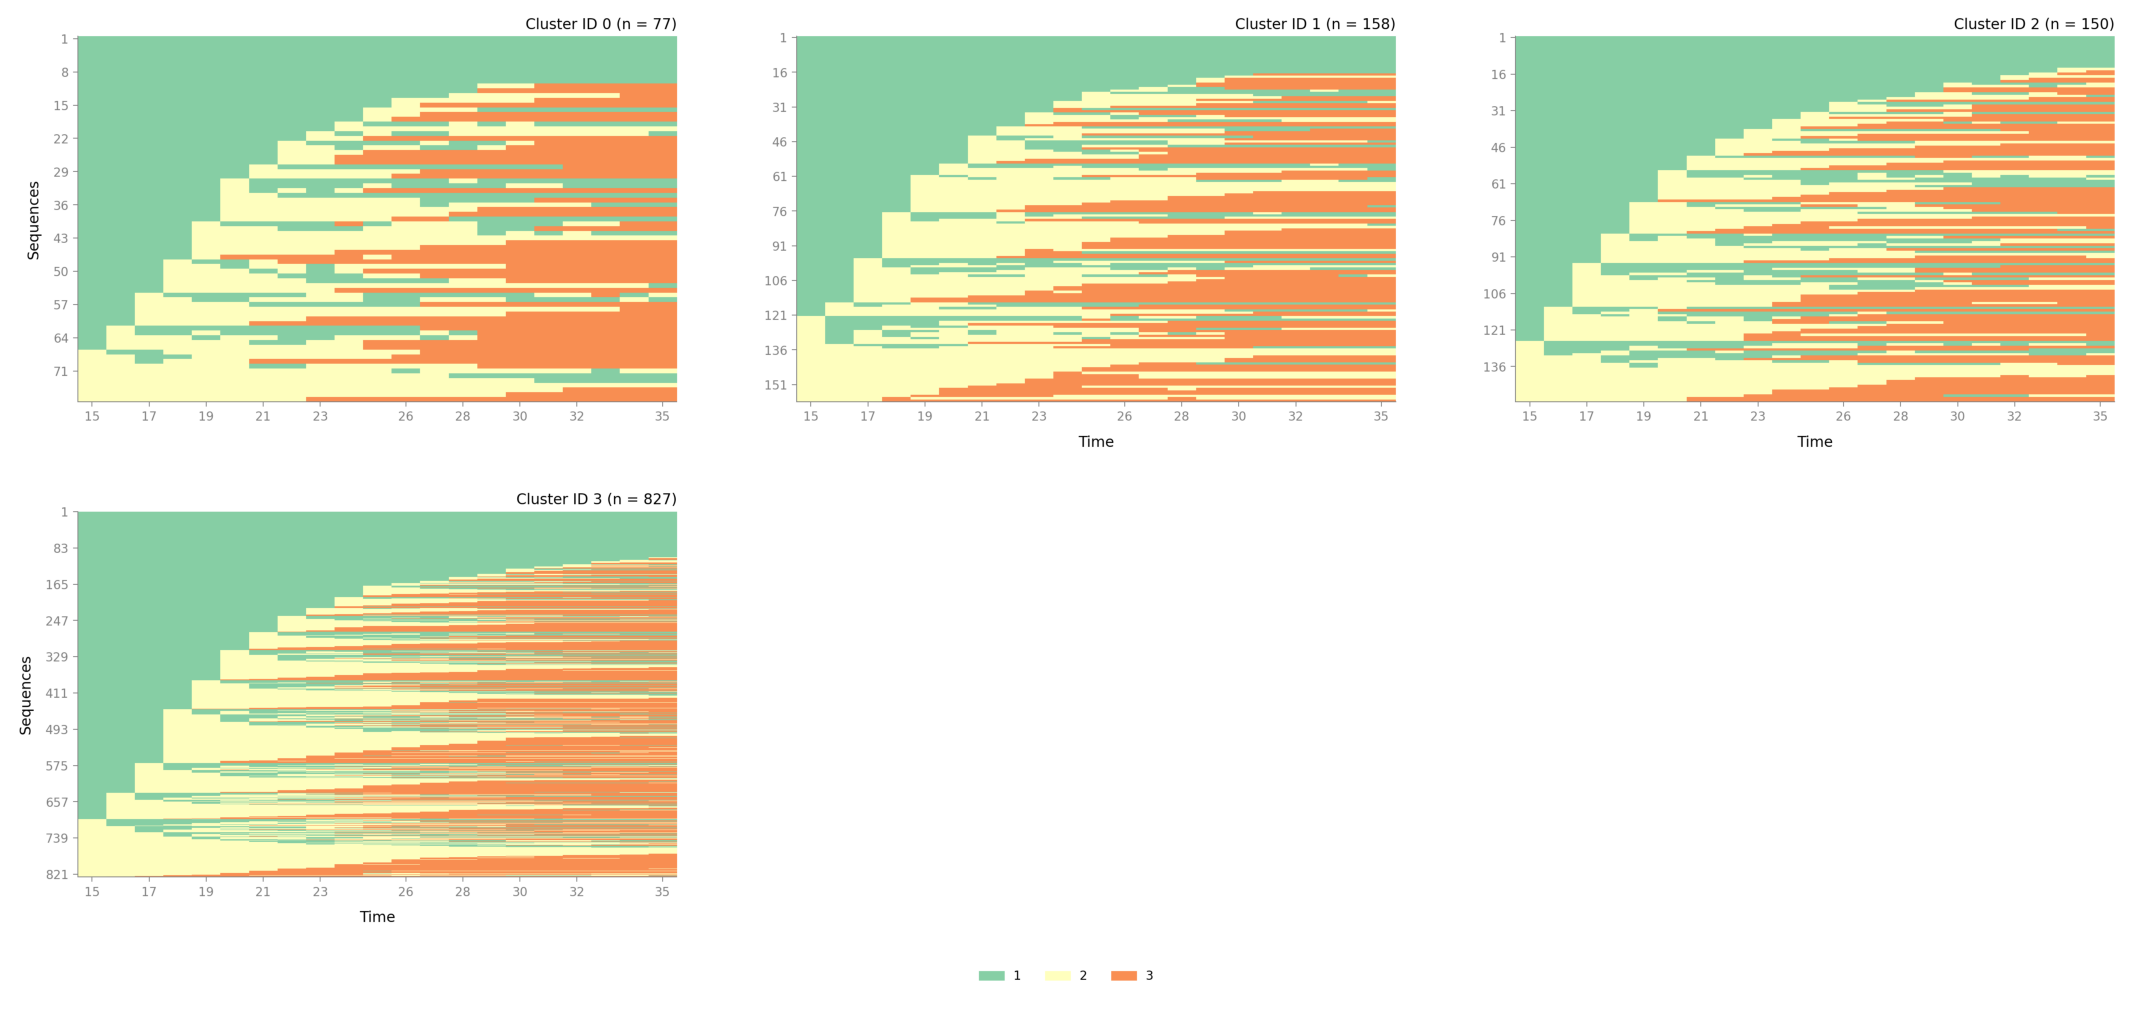

In [62]:
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=cluster_df,
                    categories='Cluster ID',
                    save_as='cluster_index_plot_family')

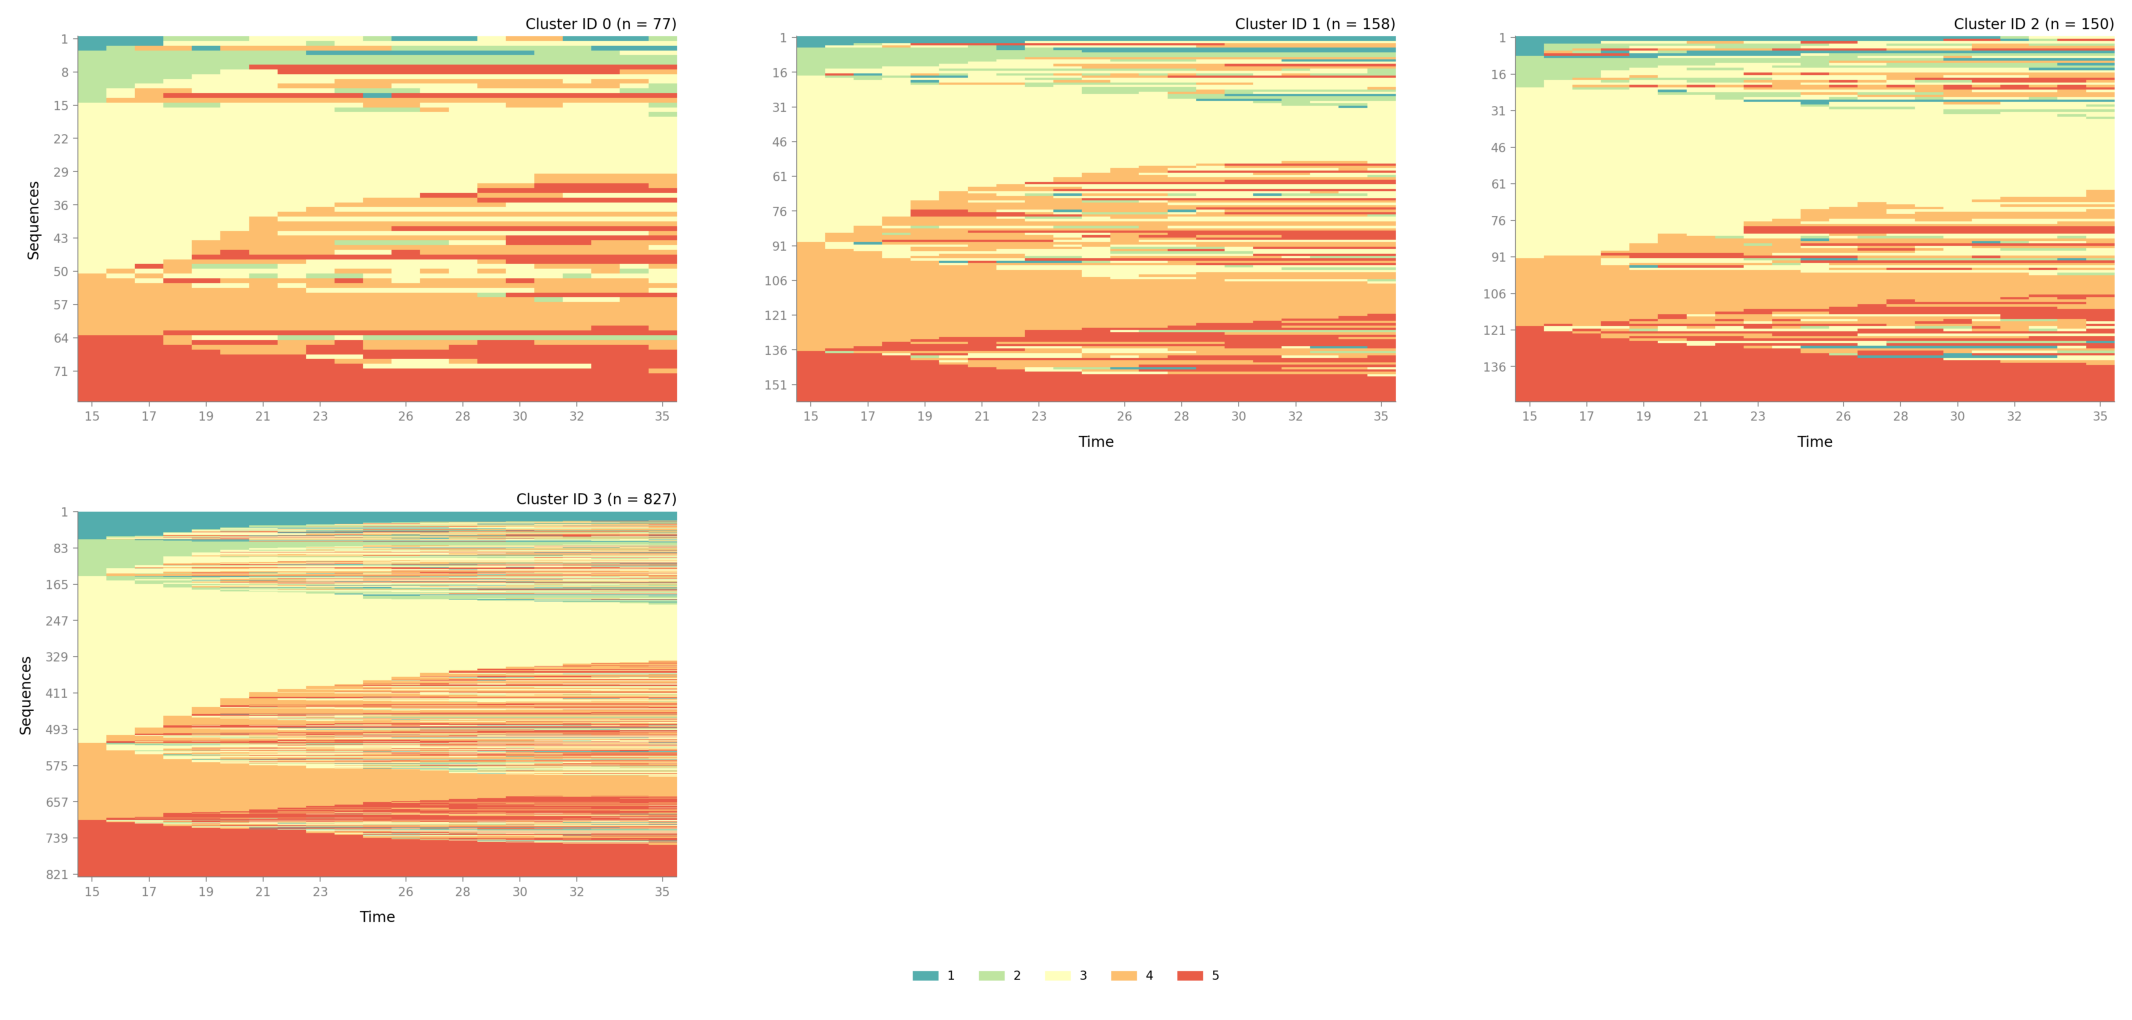

In [64]:
plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=cluster_df,
                    categories='Cluster ID',
                    save_as='cluster_index_plot_happiness')

Âå∫ÂàÜÂ∫¶ËøòÊòØ‰∏çÂ§üÔºåÂàÜÂºÄÔºö

In [14]:
import numpy as np
import pandas as pd
from scipy.stats import entropy

def extract_sequence_features(seqdata) -> pd.DataFrame:
    """
    Extract derived features from a SequenceData object for each individual sequence.

    Features include:
    - num_unique_states: Number of unique states
    - num_transitions: Number of state changes
    - dominant_ratio: Proportion of the most frequent state
    - entropy: Entropy of the state distribution
    - mean_duration: Average duration of consecutive identical states

    :param seqdata: A SequenceData object with `.values` and `.states` attributes.
    :return: A pandas DataFrame with shape (n_sequences, n_features)
    """
    sequences = seqdata.values
    features = []

    for seq in sequences:
        seq = seq[~np.isnan(seq)]  # Remove NaNs if any
        if len(seq) == 0:
            features.append([0, 0, 0, 0, 0])
            continue

        unique, counts = np.unique(seq, return_counts=True)
        num_unique_states = len(unique)
        dominant_ratio = np.max(counts) / len(seq)
        ent = entropy(counts, base=2)

        transitions = np.sum(seq[:-1] != seq[1:])
        num_transitions = int(transitions)

        durations = []
        current_duration = 1
        for i in range(1, len(seq)):
            if seq[i] == seq[i-1]:
                current_duration += 1
            else:
                durations.append(current_duration)
                current_duration = 1
        durations.append(current_duration)
        mean_duration = np.mean(durations)

        features.append([
            num_unique_states,
            num_transitions,
            dominant_ratio,
            ent,
            mean_duration
        ])

    df = pd.DataFrame(features, columns=[
        "num_unique_states",
        "num_transitions",
        "dominant_ratio",
        "entropy",
        "mean_duration"
    ])
    df.to_csv("derived_sequence_features.csv", index=False)
    print("DataFrame Â∑≤‰øùÂ≠ò‰∏∫ derived_sequence_features.csv")
    return df


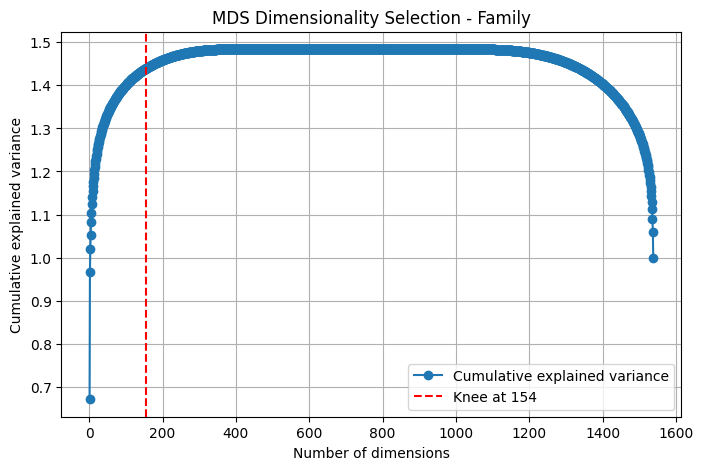

Optimal number of dimensions: 154


ModuleNotFoundError: No module named 'ace_tools'

In [10]:
# Step 1: Classic MDS
X_mds, eigvals = cmdscale(distance_matrix_family)

# Step 2: Ëß£ÈáäÊñπÂ∑ÆËÆ°ÁÆó
explained_ratio = eigvals / eigvals.sum()
cum_explained = np.cumsum(explained_ratio)

# Step 3: ÊâæËÜùÁÇπÁª¥Â∫¶Ôºà‰Ω†ÂèØ‰ª•ÊõøÊç¢‰∏∫Ëá™Âä®ÈÄâÁª¥ÂáΩÊï∞ find_optimal_mds_dimensionÔºâ
knee = find_mds_knee_point(cum_explained, title='MDS Dimensionality Selection - Family')
print(f"Optimal number of dimensions: {knee}")

# Step 4: Êà™ÂèñÂâç knee Áª¥
X_mds_optimal = X_mds[:, :knee]

# Step 5: ÊèêÂèñÊ¥æÁîüÁâπÂæÅ
feature_df = extract_sequence_features(family_sequence)  # ‰º†ÂÖ• SequenceData ÂØπË±°

# Step 6: ÊãºÊé• MDS ÂíåÁâπÂæÅÁü©Èòµ
X_combined = np.hstack([X_mds_optimal, feature_df.values])

print("Combined feature shape:", X_combined.shape)


* ÊØè‰∏™ domain ÂçïÁã¨Âª∫Ê®°Ôºà‰øùÁïôÁªìÊûÑÂ∑ÆÂºÇÔºâÔºõ

* ÊãºÊé• MDS + Ê¥æÁîüÁâπÂæÅÔºåÊó¢ÂåÖÂê´Â∫èÂàóÂΩ¢Áä∂ÔºàMDSÔºâÂèàÂåÖÂê´Ë°å‰∏∫È£éÊ†ºÔºàËäÇÂ•è/ÂàáÊç¢ÔºâÔºõ

* multi-view ËÅöÁ±ªÔºöËá™Âä®Â≠¶‰π†Âì™‰∫õ view Êõ¥ÈáçË¶ÅÔºåÂêåÊó∂Âú® latent space ËÅöÂêàÂÖ±ÊÄßÔºõ

* ËøôÊòØÁõ∏ÂØπ‰º†ÁªüÊãºÊé•Êõ¥ÂêàÁêÜÁöÑ multidomain ËÅöÁ±ªÊñπÂºèÔºåËÄåÈùûÂØπÂçï‰∏Ä domain ÂÅöÈ´òÁ∫ßÊèêÁÇº„ÄÇ



In [15]:
# 1. ÂØπ family domain
X_family_mds, _ = cmdscale(distance_matrix_family)
X_family_mds_opt = X_family_mds[:, :knee]  # ÈÄâÁª¥
X_family_feat = extract_sequence_features(family_sequence).values
X_family = np.hstack([X_family_mds_opt, X_family_feat])  # ÊãºÊé•ÂêéËæìÂá∫ (n, d1)

# 2. ÂØπ happiness domain
X_happy_mds, _ = cmdscale(distance_matrix_happiness)
X_happy_mds_opt = X_happy_mds[:, :knee]
X_happy_feat = extract_sequence_features(happiness_sequence).values
X_happiness = np.hstack([X_happy_mds_opt, X_happy_feat])  # ËæìÂá∫ (n, d2)

# 3. ‰∏§‰∏™ domain ÂêàÊàêÂ§öËßÜËßíËæìÂÖ•Ôºà‰æõ Multi-view clustering ‰ΩøÁî®Ôºâ
views = [X_family, X_happiness]


DataFrame Â∑≤‰øùÂ≠ò‰∏∫ derived_sequence_features.csv
DataFrame Â∑≤‰øùÂ≠ò‰∏∫ derived_sequence_features.csv


In [19]:
labels, probs = multi_view_soft_gmm_clustering(views, n_clusters=4)

In [20]:
cluster_df = pd.DataFrame({
    "ID": family_df['ID'],   # ÊõøÊç¢‰∏∫‰Ω†ÂØπÂ∫îÁöÑ ID Âàó
    "Cluster ID": labels
})

cluster_df

ID  Cluster ID
0        1           1
1        2           1
2        5           1
3        6           1
4        7           1
...    ...         ...
1533  1992           1
1534  1995           1
1535  1996           1
1536  1997           1
1537  1999           1

[1538 rows x 2 columns]

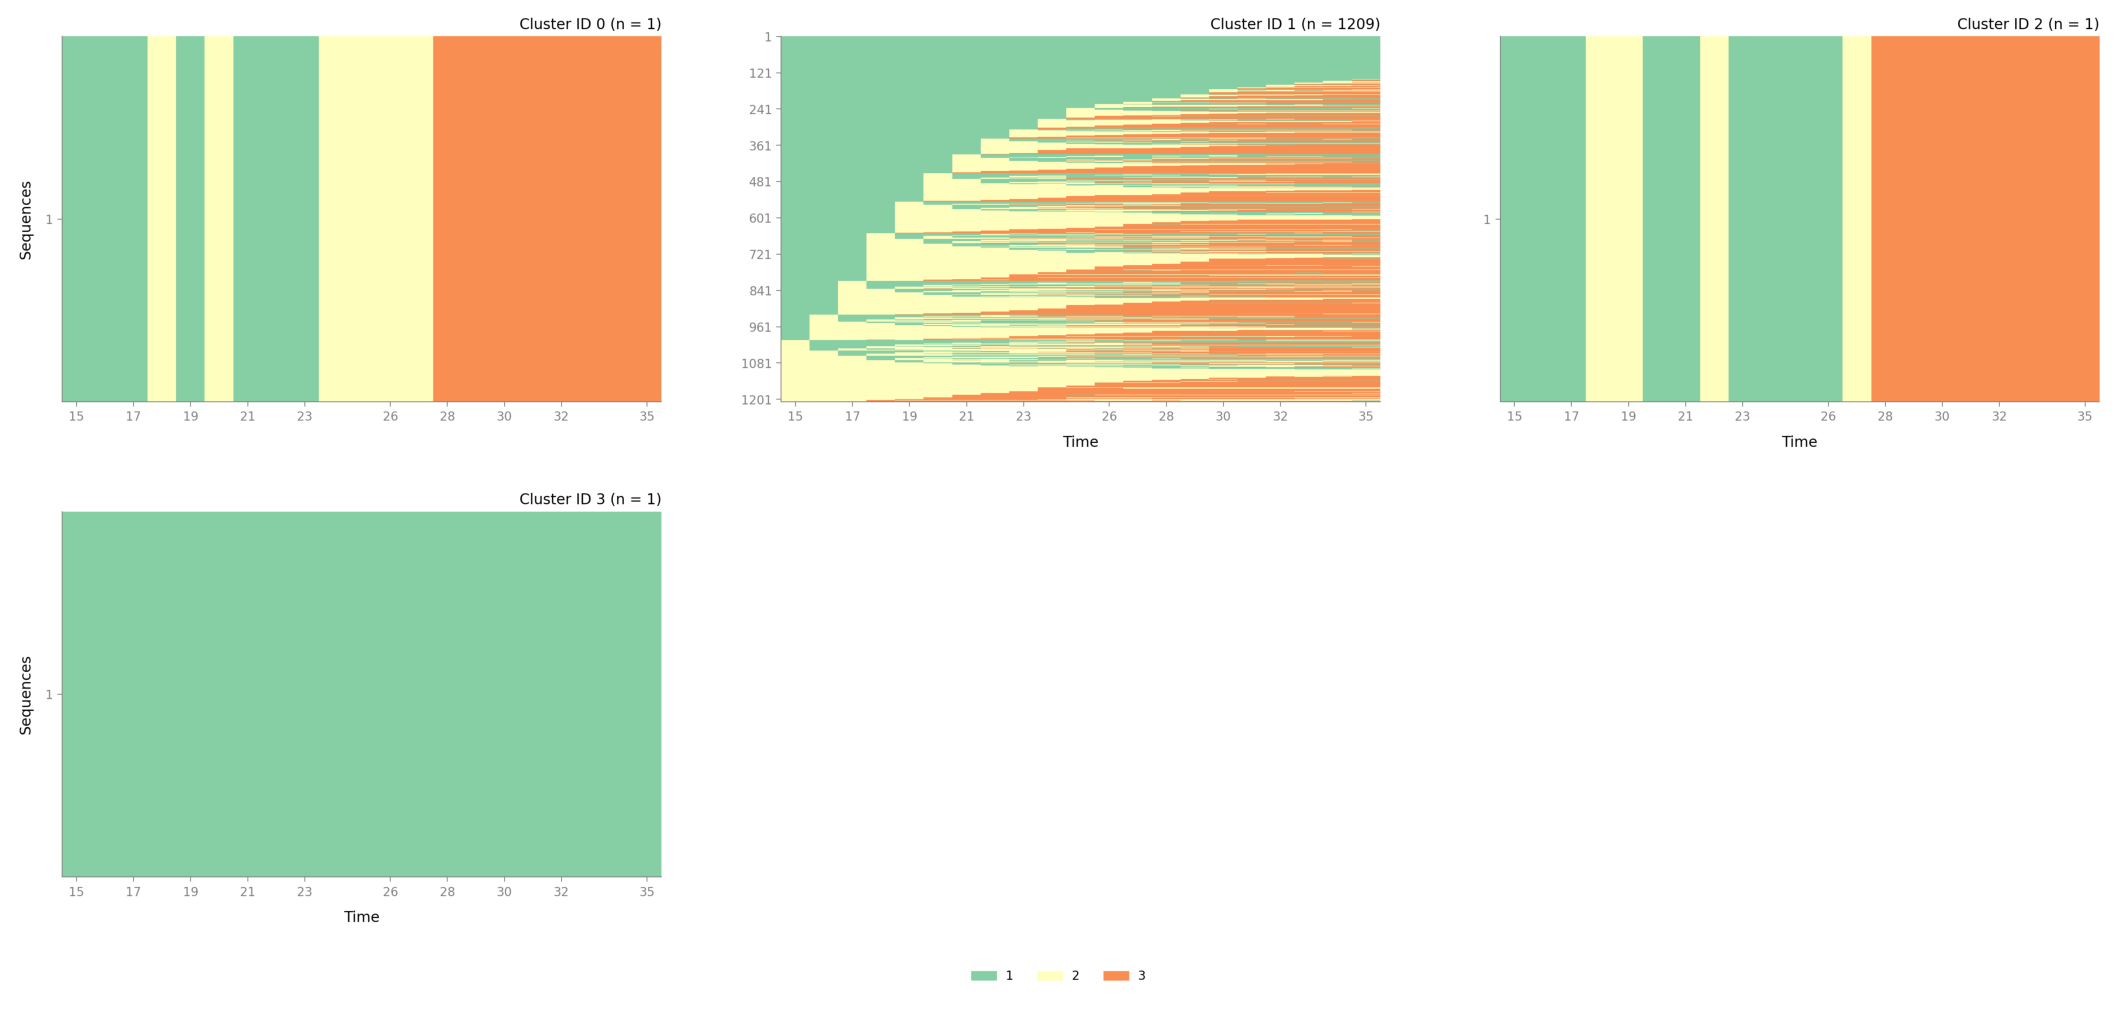

In [21]:
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=cluster_df,
                    categories='Cluster ID',
                    save_as='cluster_index_plot_family')